### Read The Data




In [1]:
import pandas as pd # Pandas supports reading data from various file formats like CSV, Excel, SQL databases, etc
import numpy as np  #library for numerical operations in Python

In [2]:
df=pd.read_csv(r'D:\project\flight\csv data\Scraped_dataset.csv')
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


## Data Manipulation

In [3]:
# Convert the data to the form d-d-d

df['Date of Booking'] = df['Date of Booking'].str.replace('/', '-')
df['Date of Journey'] = df['Date of Journey'].str.replace('/', '-')
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15-01-2023,16-01-2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15-01-2023,16-01-2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15-01-2023,16-01-2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15-01-2023,16-01-2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15-01-2023,16-01-2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


In [4]:
# Define a lambda function to convert the day value to a day name
def convert_day_to_name(date):
    day_name = date.strftime('%A')
    return day_name

In [5]:
# Extract Journey Day from the Date of Journey. (working with a DataFrame in pandas and trying to create a new column 'Journey\_Day' based on the 'Date of Journey' column. The code you provided is using the `pd.to_datetime` function to convert the 'Date of Journey' column to a datetime format, then applying a custom function `convert_day_to_name` to extract the day name, and finally converting the result to a categorical data type.)

df['Journey_Day']=pd.to_datetime(df['Date of Journey'],format='%d-%m-%Y').apply(convert_day_to_name).astype('category')
df.head(10)

#Extract Total Stops
df['Total Stops'] = df['Total Stops'].str.split('\n').str[0]
df.head(10)

#Extract Airline
df['Airline']=df['Airline-Class'].str.split('\s\n').str[0]
df.head(10)

#Extract Flight Code
df['Flight Code']=df['Airline-Class'].str.split('\n').str[1]
df.head(10)

#Extract Flight Class
df['Flight Class']=df['Airline-Class'].str.split('\n').str[2]
df.head(10)

#Extract Source
df['Source']=df['Departure Time'].str.split('\n').str[1]
df.head(10)

#Extract Destination
df['Destination']=df['Arrival Time'].str.split('\n').str[1]
df.head(10)


,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,Journey_Day,Airline,Flight Code,Flight Class,Source,Destination
0,15-01-2023,16-01-2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",Monday,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai
1,15-01-2023,16-01-2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",Monday,Indigo,6E-2519,ECONOMY,Delhi,Mumbai
2,15-01-2023,16-01-2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",Monday,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai
3,15-01-2023,16-01-2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",Monday,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai
4,15-01-2023,16-01-2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",Monday,Air India,AI-805,ECONOMY,Delhi,Mumbai
5,15-01-2023,16-01-2023,Air India \nAI-605\nECONOMY,21:20\nDelhi,23:35\nMumbai,02h 15m,non-stop,"5,955",Monday,Air India,AI-605,ECONOMY,Delhi,Mumbai
6,15-01-2023,16-01-2023,Air India \nAI-814\nECONOMY,22:30\nDelhi,00:45\nMumbai,02h 15m,non-stop,"5,955",Monday,Air India,AI-814,ECONOMY,Delhi,Mumbai
7,15-01-2023,16-01-2023,GO FIRST \nG8- 330\nECONOMY,21:00\nDelhi,23:15\nMumbai,02h 15m,non-stop,"5,899",Monday,GO FIRST,G8- 330,ECONOMY,Delhi,Mumbai
8,15-01-2023,16-01-2023,SpiceJet \nSG-2976\nECONOMY,20:10\nDelhi,10:30\nMumbai,14h 20m,1-stop,"5,829",Monday,SpiceJet,SG-2976,ECONOMY,Delhi,Mumbai
9,15-01-2023,16-01-2023,GO FIRST \nG8- 346\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,899",Monday,GO FIRST,G8- 346,ECONOMY,Delhi,Mumbai


In [6]:
# Map Departure Time to categories
def map_time_to_category(time_str):
    hour = pd.to_datetime(time_str).hour
    if hour < 6:
        return 'Before 6 AM'
    elif hour >= 6 and hour < 12:
        return '6 AM - 12 PM'
    elif hour >= 12 and hour < 18:
        return '12 PM - 6 PM'
    elif hour >= 18:
        return 'After 6 PM'
    else:
        return 'Other'

# Apply the lambda function to the 'Time' column and store the result in a new column
df['Departure']=df['Departure Time'].str.split('\n').str[0].apply(map_time_to_category)
df.head()

# Apply the lambda function to the 'Time' column and store the result in a new column
df['Arrival']=df['Arrival Time'].str.split('\n').str[0].apply(map_time_to_category)
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,Journey_Day,Airline,Flight Code,Flight Class,Source,Destination,Departure,Arrival
0,15-01-2023,16-01-2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",Monday,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM
1,15-01-2023,16-01-2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",Monday,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM
2,15-01-2023,16-01-2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",Monday,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM
3,15-01-2023,16-01-2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",Monday,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM
4,15-01-2023,16-01-2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",Monday,Air India,AI-805,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM


In [7]:
def convert_time_to_decimal(time_str):
    # Check if the input is already a float (decimal time)
    if isinstance(time_str, float):    #isinstance() function is used to check if an object belongs to a specified class or type.
        return time_str  # If it's already a float, return as is

    # Split the time string into hours and minutes
    time_parts = time_str.split('h ')
    hours = int(time_parts[0])
    
    # Extract the minutes, remove the 'm' suffix, and convert to an integer
    minutes = int(time_parts[1].replace('m', ''))
    
    # Calculate the decimal time by adding hours and converting minutes to fraction of an hour
    decimal_time = hours + (minutes / 60)
    
    return decimal_time


# Apply the lambda function to the 'Duration' column and store the result in a new column
df['Duration'] = df['Duration'].apply(convert_time_to_decimal)
df.head()


,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,Journey_Day,Airline,Flight Code,Flight Class,Source,Destination,Departure,Arrival
0,15-01-2023,16-01-2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,2.083333,non-stop,"5,335",Monday,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM
1,15-01-2023,16-01-2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,2.333333,non-stop,"5,899",Monday,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM
2,15-01-2023,16-01-2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,2.166667,non-stop,"5,801",Monday,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM
3,15-01-2023,16-01-2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,2.083333,non-stop,"5,794",Monday,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM
4,15-01-2023,16-01-2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,2.166667,non-stop,"5,955",Monday,Air India,AI-805,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM


In [8]:
#converting date columns to datetime format and calculating the number of days left between the 'Date of Booking' and 'Date of Journey
#a datetime format refers to a standardized way of representing and parsing date and time information. It typically consists of
#a combination of codes representing various components such as year, month, day, hour, minute, second, and microsecond.

# Convert the date columns to datetime format
df['Date of Booking'] = pd.to_datetime(df['Date of Booking'])
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])

# Calculate the days left between the 'Booking Date' and 'Journey Date' columns
df['Days_left'] = (df['Date of Journey'] - df['Date of Booking']).dt.days #.dt.days attribute is used to extract the number of days as integers.
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_13576\2764823730.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date of Booking'] = pd.to_datetime(df['Date of Booking'])
C:\Users\hp\AppData\Local\Temp\ipykernel_13576\2764823730.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])


,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,Journey_Day,Airline,Flight Code,Flight Class,Source,Destination,Departure,Arrival,Days_left
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,2.083333,non-stop,"5,335",Monday,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,2.333333,non-stop,"5,899",Monday,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM,1
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,2.166667,non-stop,"5,801",Monday,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM,1
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,2.083333,non-stop,"5,794",Monday,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,2.166667,non-stop,"5,955",Monday,Air India,AI-805,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1


In [9]:
# Renaming and remove , from the price value
df['Fare'] = df['Price'].str.replace(',', '').astype(float)
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,Journey_Day,Airline,Flight Code,Flight Class,Source,Destination,Departure,Arrival,Days_left,Fare
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,2.083333,non-stop,"5,335",Monday,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5335.0
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,2.333333,non-stop,"5,899",Monday,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM,1,5899.0
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,2.166667,non-stop,"5,801",Monday,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM,1,5801.0
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,2.083333,non-stop,"5,794",Monday,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5794.0
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,2.166667,non-stop,"5,955",Monday,Air India,AI-805,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5955.0


In [10]:
#deleting columns Airline class, Departure Time , Arrival Time,Price
df = df.drop('Airline-Class', axis=1) #axis=1 indicating column and  0 for row
df = df.drop('Departure Time', axis=1)
df = df.drop('Arrival Time', axis=1)
df = df.drop('Price', axis=1)
df = df.drop('Date of Booking',axis=1)
df.head(14)

,Date of Journey,Duration,Total Stops,Journey_Day,Airline,Flight Code,Flight Class,Source,Destination,Departure,Arrival,Days_left,Fare
0,2023-01-16,2.083333,non-stop,Monday,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5335.0
1,2023-01-16,2.333333,non-stop,Monday,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM,1,5899.0
2,2023-01-16,2.166667,non-stop,Monday,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM,1,5801.0
3,2023-01-16,2.083333,non-stop,Monday,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5794.0
4,2023-01-16,2.166667,non-stop,Monday,Air India,AI-805,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5955.0
5,2023-01-16,2.250000,non-stop,Monday,Air India,AI-605,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5955.0
6,2023-01-16,2.250000,non-stop,Monday,Air India,AI-814,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM,1,5955.0
7,2023-01-16,2.250000,non-stop,Monday,GO FIRST,G8- 330,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5899.0
8,2023-01-16,14.333333,1-stop,Monday,SpiceJet,SG-2976,ECONOMY,Delhi,Mumbai,After 6 PM,6 AM - 12 PM,1,5829.0
9,2023-01-16,2.083333,non-stop,Monday,GO FIRST,G8- 346,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5899.0


In [11]:
#to check missing value. by descibe we will get missing value , mean , std,min , max etc
df.describe() 

,Date of Journey,Duration,Days_left,Fare
count,452088,452088.000000,452088.000000,452088.000000
mean,2023-02-09 15:04:10.740563456,12.349222,25.627902,22840.100890
min,2023-01-16 00:00:00,0.750000,1.000000,1307.000000
25%,2023-01-28 00:00:00,6.583333,13.000000,8762.750000
50%,2023-02-10 00:00:00,11.333333,26.000000,13407.000000
75%,2023-02-22 00:00:00,16.500000,38.000000,35587.000000
max,2023-03-06 00:00:00,43.583333,50.000000,143019.000000
std,NaN,7.431478,14.300846,20307.963002


In [12]:
# get numbers of null values 
Null_Values=df.isnull().sum()
Null_Values

Date of Journey    0
Duration           0
Total Stops        0
Journey_Day        0
Airline            0
Flight Code        0
Flight Class       0
Source             0
Destination        0
Departure          0
Arrival            0
Days_left          0
Fare               0
dtype: int64

In [13]:
# get number of dublicate records 
print("number of dublicate records:",df.duplicated().sum())
print("precentage of dublicate records:" ,(df.duplicated().sum()/df.shape[0])*100,"%")

number of dublicate records: 6722
precentage of dublicate records: 1.4868786607917044 %


In [14]:
# remove dublicate records
print("shape before remove dublicates:",df.shape)

shape before remove dublicates: (452088, 13)


In [15]:
# remove duplicate rows from the DataFrame and keep only the last occurrence of each duplicated entry

df.drop_duplicates(keep='last',ignore_index=True ,inplace=True)
print("shape after remove dublicates:",df.shape)
df

shape after remove dublicates: (445366, 13)


,Date of Journey,Duration,Total Stops,Journey_Day,Airline,Flight Code,Flight Class,Source,Destination,Departure,Arrival,Days_left,Fare
0,2023-01-16,2.083333,non-stop,Monday,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5335.0
1,2023-01-16,2.333333,non-stop,Monday,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM,1,5899.0
2,2023-01-16,2.166667,non-stop,Monday,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,After 6 PM,Before 6 AM,1,5801.0
3,2023-01-16,2.083333,non-stop,Monday,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5794.0
4,2023-01-16,2.166667,non-stop,Monday,Air India,AI-805,ECONOMY,Delhi,Mumbai,After 6 PM,After 6 PM,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445361,2023-03-06,11.250000,1-stop,Monday,Vistara,UK-918,BUSINESS,Ahmedabad,Chennai,Before 6 AM,12 PM - 6 PM,50,61302.0
445362,2023-03-06,11.166667,1-stop,Monday,Vistara,UK-946,BUSINESS,Ahmedabad,Chennai,6 AM - 12 PM,After 6 PM,50,65028.0
445363,2023-03-06,13.083333,1-stop,Monday,Vistara,UK-926,BUSINESS,Ahmedabad,Chennai,6 AM - 12 PM,After 6 PM,50,65028.0
445364,2023-03-06,11.250000,1-stop,Monday,Vistara,UK-918,BUSINESS,Ahmedabad,Chennai,Before 6 AM,12 PM - 6 PM,50,69254.0


In [16]:
#rearrange columns in DataFrame

desired_order = ['Date of Journey', 'Journey_Day','Days_left', 'Airline','Flight Code','Flight Class','Source','Departure','Total Stops','Arrival','Destination','Duration','Fare']
df=df[desired_order]
df.head(10)



,Date of Journey,Journey_Day,Days_left,Airline,Flight Code,Flight Class,Source,Departure,Total Stops,Arrival,Destination,Duration,Fare
0,2023-01-16,Monday,1,SpiceJet,SG-8169,ECONOMY,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.083333,5335.0
1,2023-01-16,Monday,1,Indigo,6E-2519,ECONOMY,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.333333,5899.0
2,2023-01-16,Monday,1,GO FIRST,G8- 354,ECONOMY,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.166667,5801.0
3,2023-01-16,Monday,1,SpiceJet,SG-8709,ECONOMY,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.083333,5794.0
4,2023-01-16,Monday,1,Air India,AI-805,ECONOMY,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.166667,5955.0
5,2023-01-16,Monday,1,Air India,AI-605,ECONOMY,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.250000,5955.0
6,2023-01-16,Monday,1,Air India,AI-814,ECONOMY,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.250000,5955.0
7,2023-01-16,Monday,1,GO FIRST,G8- 330,ECONOMY,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.250000,5899.0
8,2023-01-16,Monday,1,SpiceJet,SG-2976,ECONOMY,Delhi,After 6 PM,1-stop,6 AM - 12 PM,Mumbai,14.333333,5829.0
9,2023-01-16,Monday,1,GO FIRST,G8- 346,ECONOMY,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.083333,5899.0


In [17]:
#so no we got the cleaned dataset
df_cleaned=df
df_cleaned

,Date of Journey,Journey_Day,Days_left,Airline,Flight Code,Flight Class,Source,Departure,Total Stops,Arrival,Destination,Duration,Fare
0,2023-01-16,Monday,1,SpiceJet,SG-8169,ECONOMY,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.083333,5335.0
1,2023-01-16,Monday,1,Indigo,6E-2519,ECONOMY,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.333333,5899.0
2,2023-01-16,Monday,1,GO FIRST,G8- 354,ECONOMY,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.166667,5801.0
3,2023-01-16,Monday,1,SpiceJet,SG-8709,ECONOMY,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.083333,5794.0
4,2023-01-16,Monday,1,Air India,AI-805,ECONOMY,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.166667,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445361,2023-03-06,Monday,50,Vistara,UK-918,BUSINESS,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.250000,61302.0
445362,2023-03-06,Monday,50,Vistara,UK-946,BUSINESS,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.166667,65028.0
445363,2023-03-06,Monday,50,Vistara,UK-926,BUSINESS,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.083333,65028.0
445364,2023-03-06,Monday,50,Vistara,UK-918,BUSINESS,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.250000,69254.0


In [18]:
#saving the cleaned dataset in csv format
df_cleaned.to_csv(r"D:\project\flight\csv data\cleaned_dataset.csv", index=False)



# Exploratory Data Analysis(EDA)

In [19]:
df_cleaned.Airline.value_counts()

Airline
Vistara        226204
Air India      118405
Indigo          65659
AirAsia         15764
GO FIRST        10786
SpiceJet         5863
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Print all columns and their indexes.
for index, value in enumerate(df.columns) :
    print(index, ":", value)

0 : Date of Journey
1 : Journey_Day
2 : Days_left
3 : Airline
4 : Flight Code
5 : Flight Class
6 : Source
7 : Departure
8 : Total Stops
9 : Arrival
10 : Destination
11 : Duration
12 : Fare


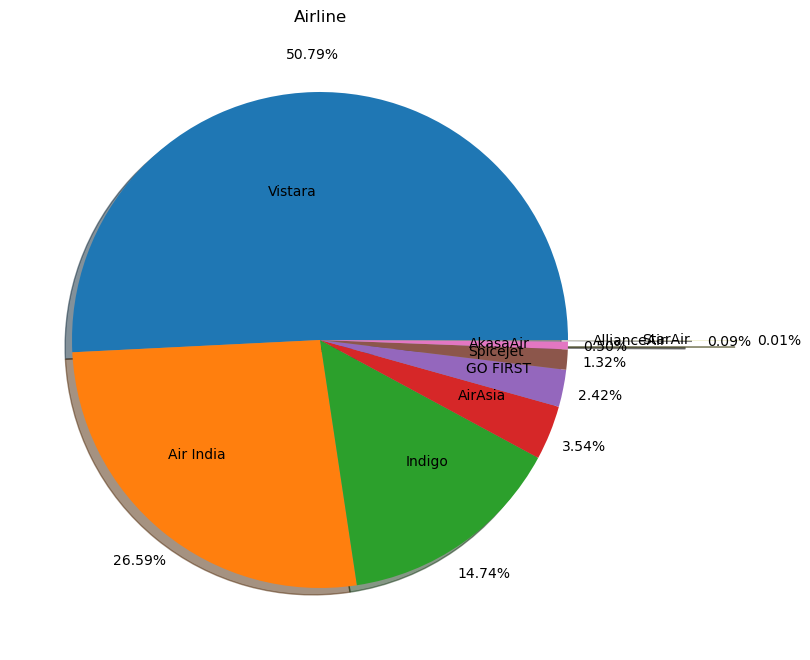

Airline
Vistara        226204
Air India      118405
Indigo          65659
AirAsia         15764
GO FIRST        10786
SpiceJet         5863
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: count, dtype: int64


In [21]:
figure, axis = plt.subplots(figsize=(8,10))
class_counts = df["Airline"].value_counts()
explode=(0,0,0,0,0,0,0,0.5,0.7)
plt.pie(class_counts, labels=class_counts.index, autopct='%.2f%%',shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
plt.title("Airline")
plt.show()
print(class_counts)

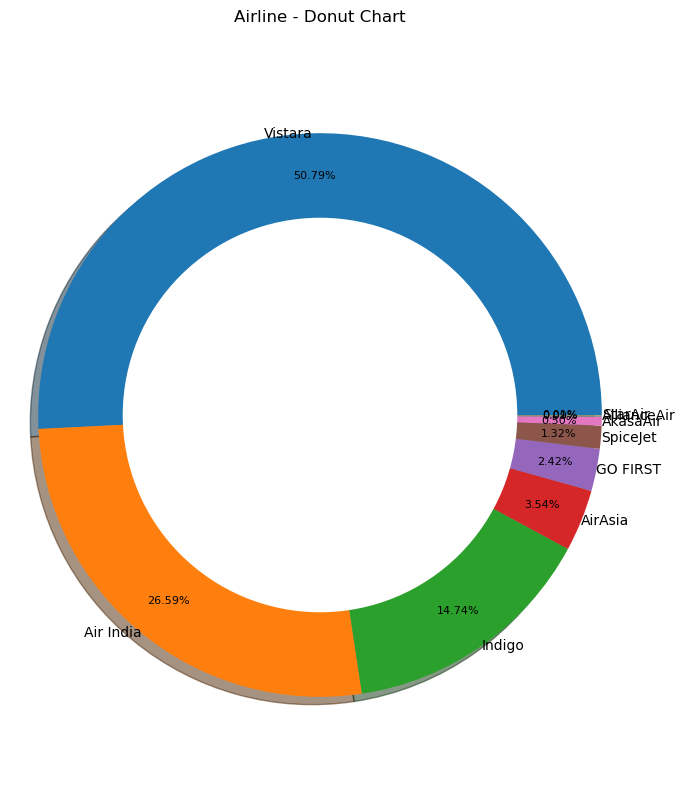

In [22]:
import matplotlib.pyplot as plt
class_counts = df["Airline"].value_counts()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 10))
wedges, texts, autotexts = ax.pie(class_counts, labels=class_counts.index, autopct='%.2f%%', 
                                  shadow=True, pctdistance=0.85, labeldistance=1.0, wedgeprops=dict(width=0.4))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Customizing the center circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Adding data labels inside the donut
for text, autotext in zip(texts, autotexts):
    text.set(size=10)
    autotext.set(size=8)

plt.title("Airline - Donut Chart")
plt.show()


***Most used Airline is Vistara(50.79%)***

***Second place is Air India(26.59%)***

***Less used Airline is Star Air(0.01%)***

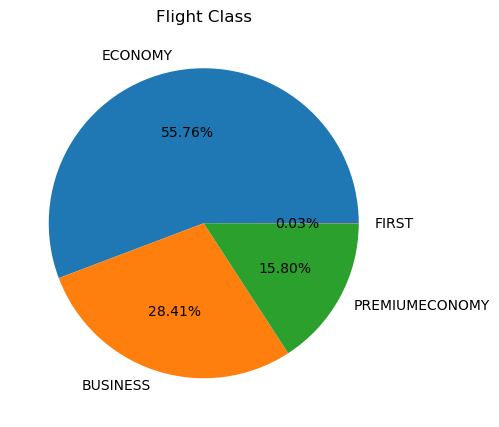

Flight Class
ECONOMY           248323
BUSINESS          126535
PREMIUMECONOMY     70364
FIRST                144
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(figsize=(5,7))
class_counts = df["Flight Class"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%.2f%%')
plt.title("Flight Class")
plt.show()
print(class_counts)



#### Most of the flights are Economy Class (55.76%)

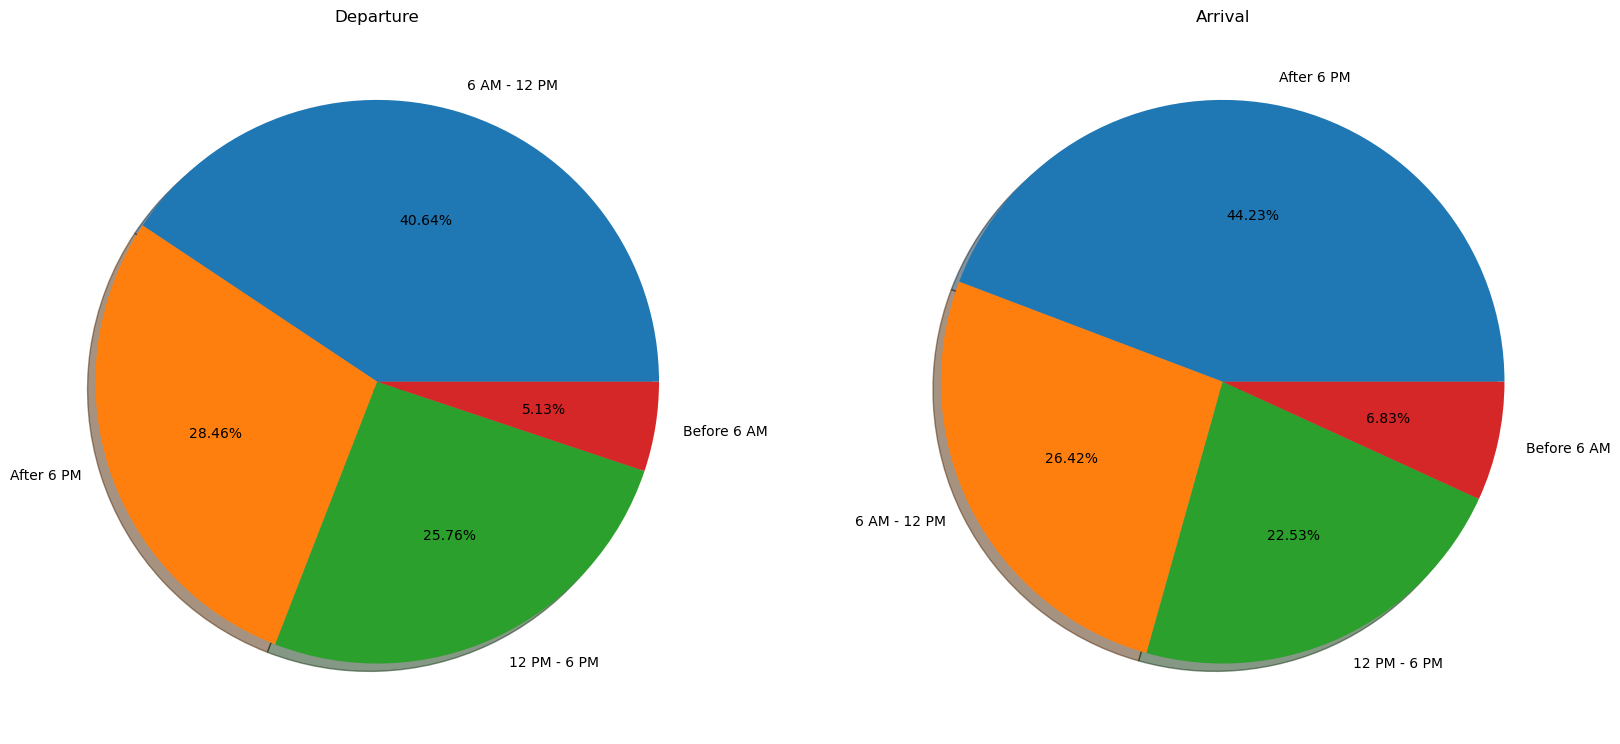

In [24]:
figure, axis = plt.subplots(1, 2,figsize=(20,10))

class_counts = df["Departure"].value_counts()
axis[0].pie(class_counts, labels=class_counts.index, autopct='%.2f%%',shadow=True)
axis[0].set_title("Departure")

class_counts = df["Arrival"].value_counts()
axis[1].pie(class_counts, labels=class_counts.index, autopct='%.2f%%',shadow=True)
axis[1].set_title("Arrival")

plt.show()

***Many flights have departure and arrival times between 6 AM and 12 PM***

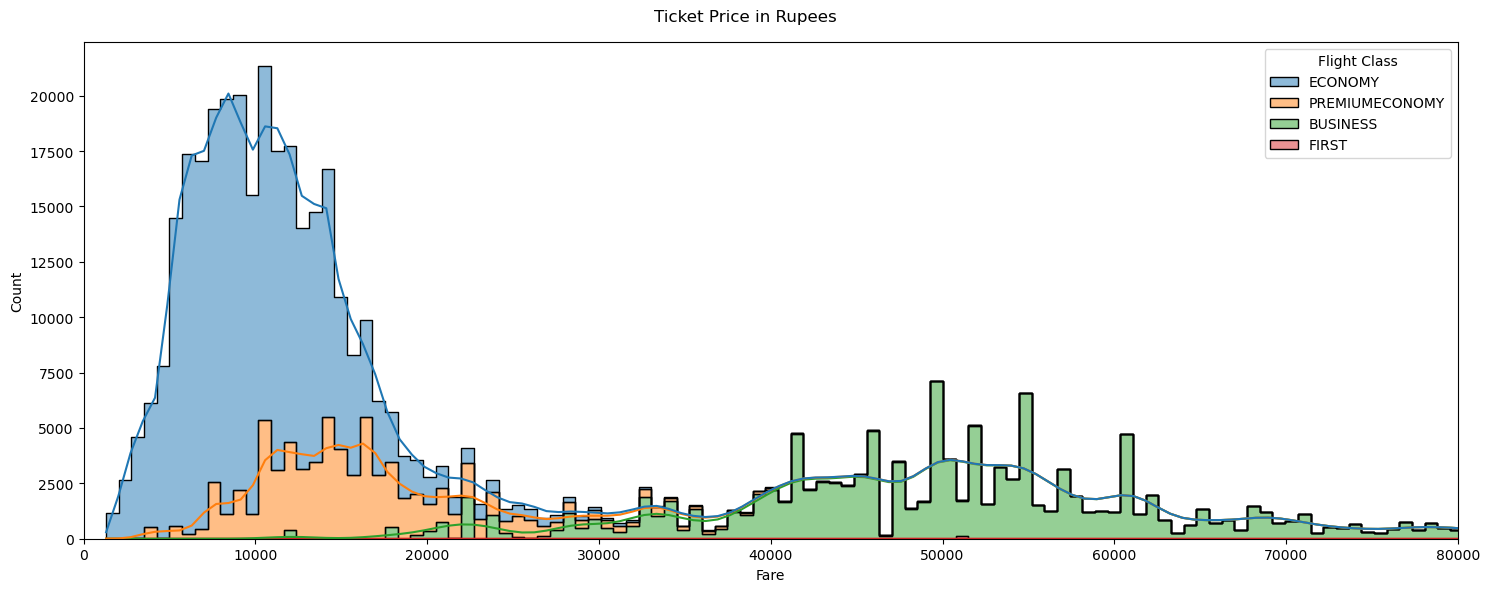

The Minimum Fare for Economy is :1307.0


In [25]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 6))
# Define a custom color palette
colors = sns.color_palette("Pastel1", n_colors=len(df['Flight Class'].unique()))

# Create a histogram with kde for each flight class
sns.histplot(x='Fare', data=df, kde=True, hue='Flight Class', multiple="stack", element='step', ax=ax)

# Set limits for better visibility
ax.set_xlim(0, 80000)

# Set title
plt.suptitle('Ticket Price in Rupees')

# Explicitly call tight_layout
plt.tight_layout()

plt.savefig(r'C:\Users\hp\Desktop\project graph\output_plot.pdf', format='pdf')


# Show the plot
plt.show()

#conclusions
economy_min_fare=df[df['Flight Class']=='ECONOMY']['Fare'].min()
print(f"The Minimum Fare for Economy is :{economy_min_fare}")




***Most of the Tickets are priced between 3000 - 15000***

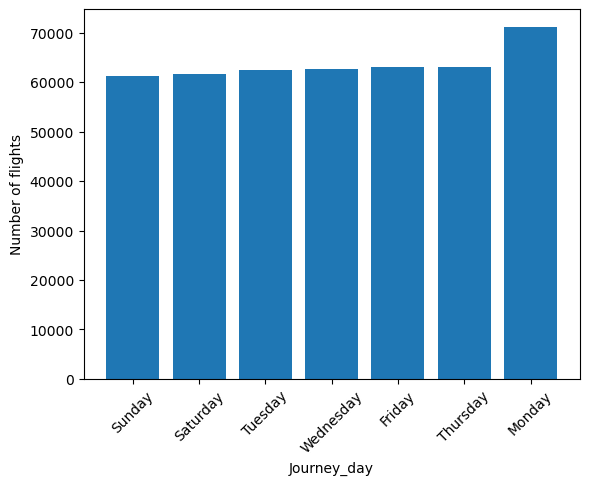

In [26]:
# Group the data by Arrival and calculate the mean Fare
arrival_fares = df.groupby('Journey_Day')['Journey_Day'].count().sort_values()

# Plot the bar chart
plt.bar(arrival_fares.index, arrival_fares.values)
plt.xticks(rotation=45)
plt.xlabel('Journey_day')
plt.ylabel('Number of flights')
plt.show()

**The number of flights is nearly the same every day**








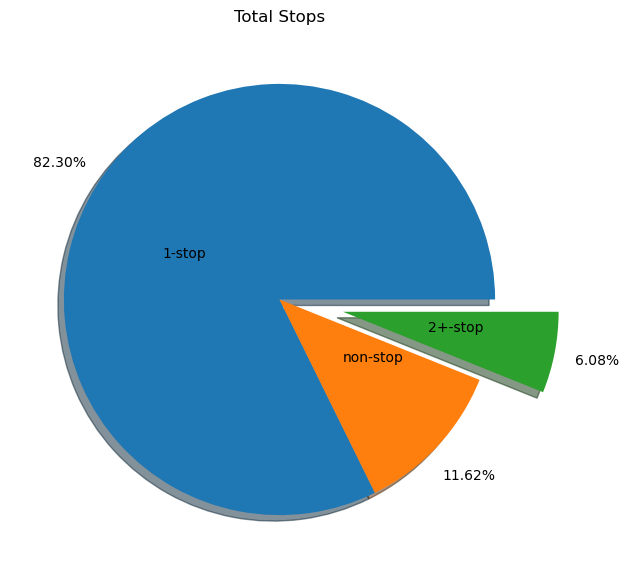

In [27]:
figure, axis = plt.subplots(figsize=(7,7))
class_counts = df["Total Stops"].value_counts()
explode=(0,0,0.3)
plt.pie(class_counts, labels=class_counts.index, autopct='%.2f%%',shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
plt.title("Total Stops")
plt.show()

***Most of the flights have 1 stop (about 82.3% )***

***Just 6.08% of flights have 2 or more than 2 stops during their flights***

***About 11.62% of flights have not any stop***

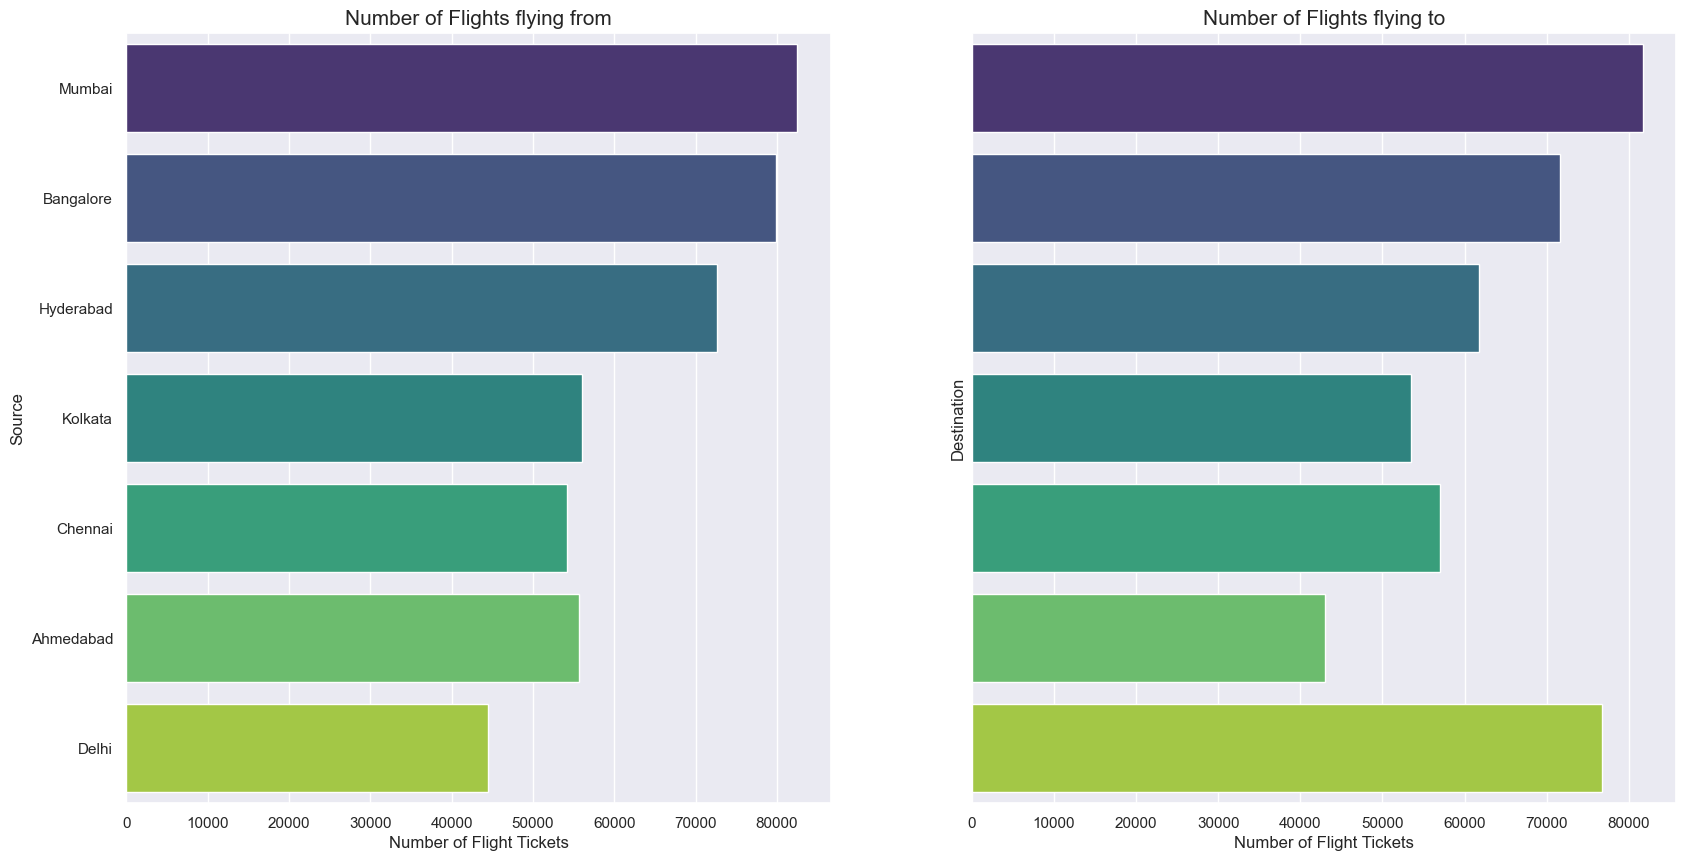

In [28]:
# Lets first find the number of flights flying from and to each airport

sns.set(style='darkgrid')
fig,axs = plt.subplots(1,2, figsize=(20,10),sharey=True)
sns.countplot(data=df,y="Source",ax=axs[0],palette='viridis')
sns.countplot(data=df,y="Destination",ax=axs[1],palette='viridis')
for ax in axs:
    ax.set_xlabel('Number of Flight Tickets')
axs[0].set_title("Number of Flights flying from",size=15)
axs[1].set_title("Number of Flights flying to",size=15)
plt.show()

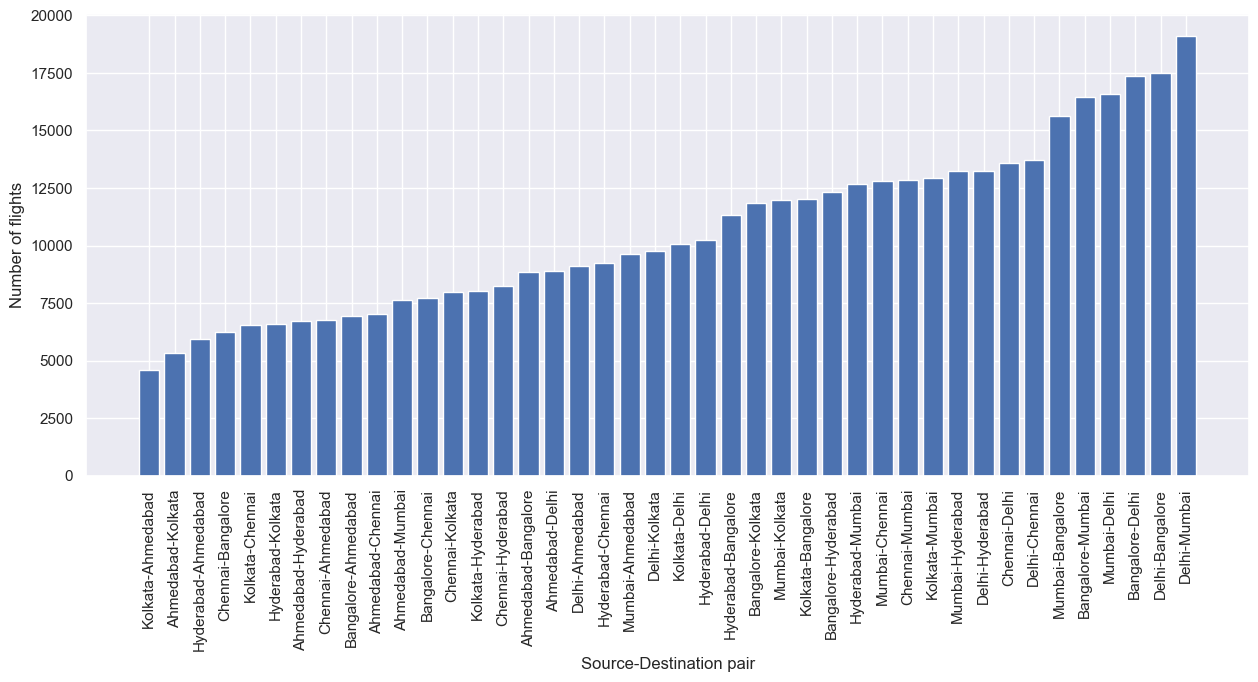

In [29]:
# Count the number of flights for each source-destination pair
flight_count = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')

# Sort the data by count
flight_count = flight_count.sort_values(by='Count')

# Plot a bar chart of the flight count by source-destination pairs
fig = plt.figure(figsize=(15, 6))
plt.bar(flight_count['Source'] + '-' + flight_count['Destination'], flight_count['Count'])
plt.xticks(rotation=90)
plt.xlabel('Source-Destination pair')
plt.ylabel('Number of flights')
plt.show()

***The highest number of flights are between Delhi-Mumbai and Delhi-Bangalore***

***The least number of flights are between Kolkata-Ahmedabad***

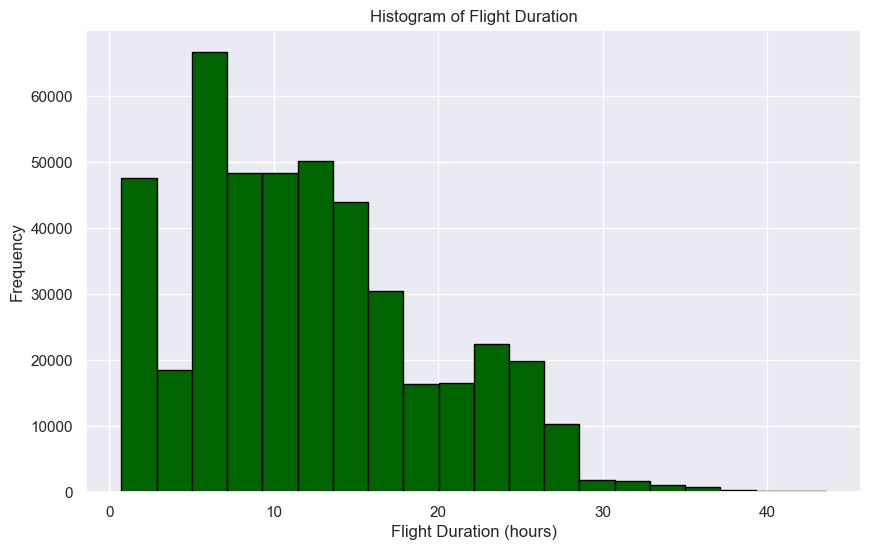

The minimum flight duration is: 0.75 hours
The maximum flight duration is : 43.583333333333336 hours
The most frequent flight duration is: 2.25 hours


In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['Duration'], bins=20,color='darkgreen',edgecolor='black')
plt.xlabel('Flight Duration (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Duration')
plt.show()

min_duration = df['Duration'].min()
print(f"The minimum flight duration is: {min_duration} hours")
max_duration=df['Duration'].max()
print(f"The maximum flight duration is : {max_duration} hours")
most_frequent_duration = df['Duration'].mode().values[0]
print(f"The most frequent flight duration is: {most_frequent_duration} hours")

***The minimum duration of a flight is 0.75 hours, indicating that there are some very short flights in the dataset. The maximum duration of a flight is 43.58 hours and most frequent flight duration is 2.25 hours***

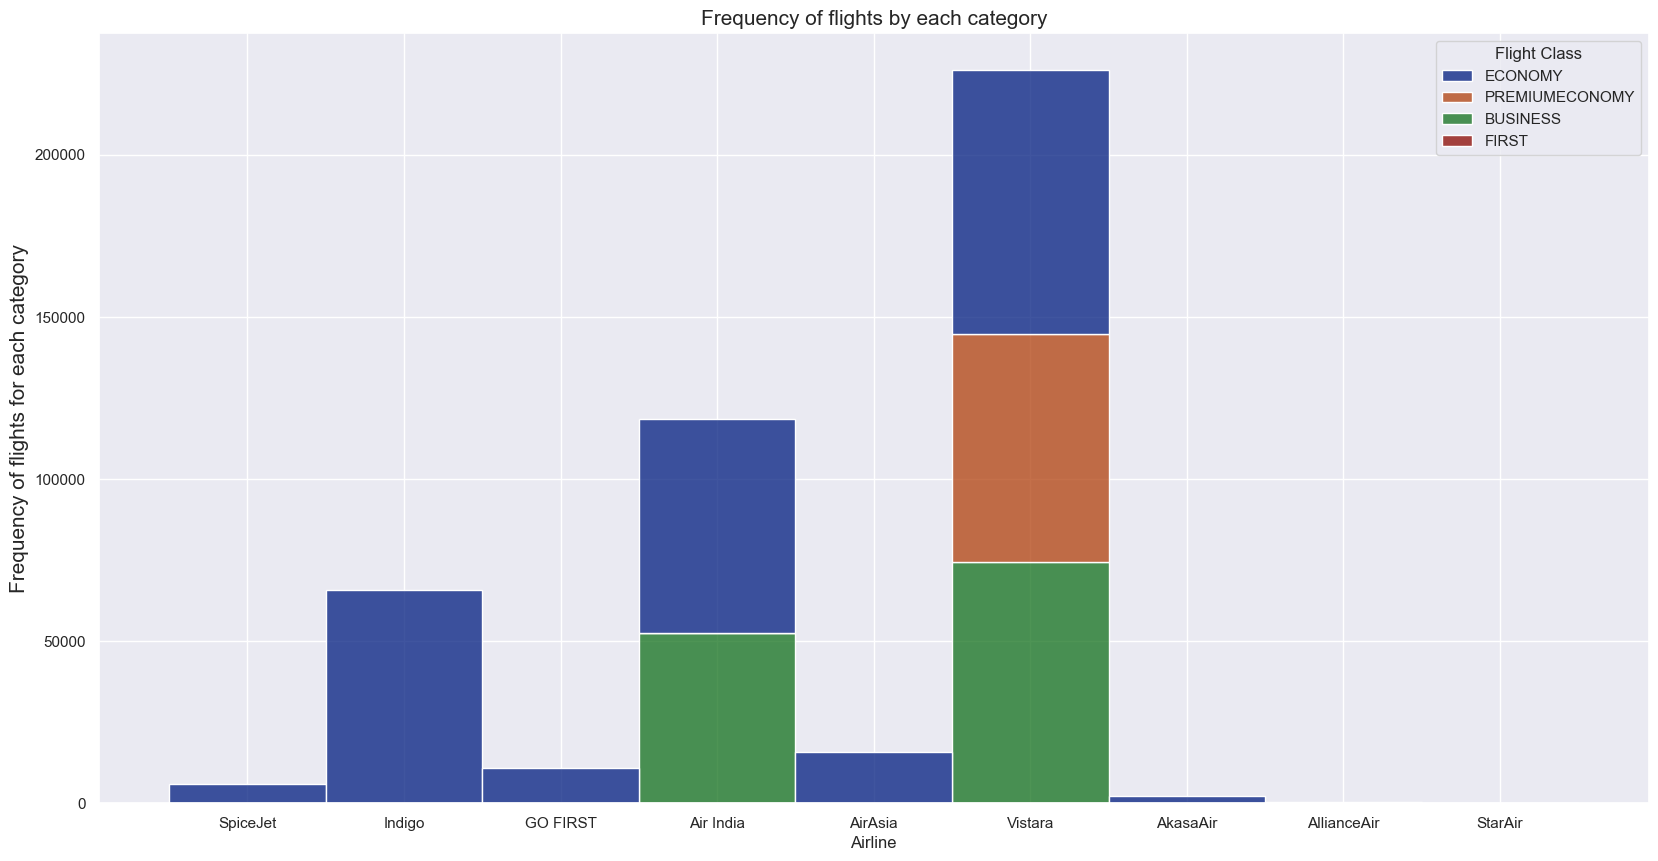

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(20, 10))
custom_palette = sns.color_palette("dark",4)
sns.histplot(data=df, x='Airline', hue='Flight Class', multiple='stack',palette=custom_palette)
plt.ylabel("Frequency of flights for each category", size=15)
plt.title("Frequency of flights by each category", size=15)
plt.show()
plt.savefig('plot.png', format='png', dpi=300)  # Adjust the DPI as needed



***Vistara is the only airline that has Premium Economy class***

***Vistara and Air India are the only airline that has Business class***

***All airlines has Economy class***

## Insightful Data Processing


### Average Fare vs Journey Day

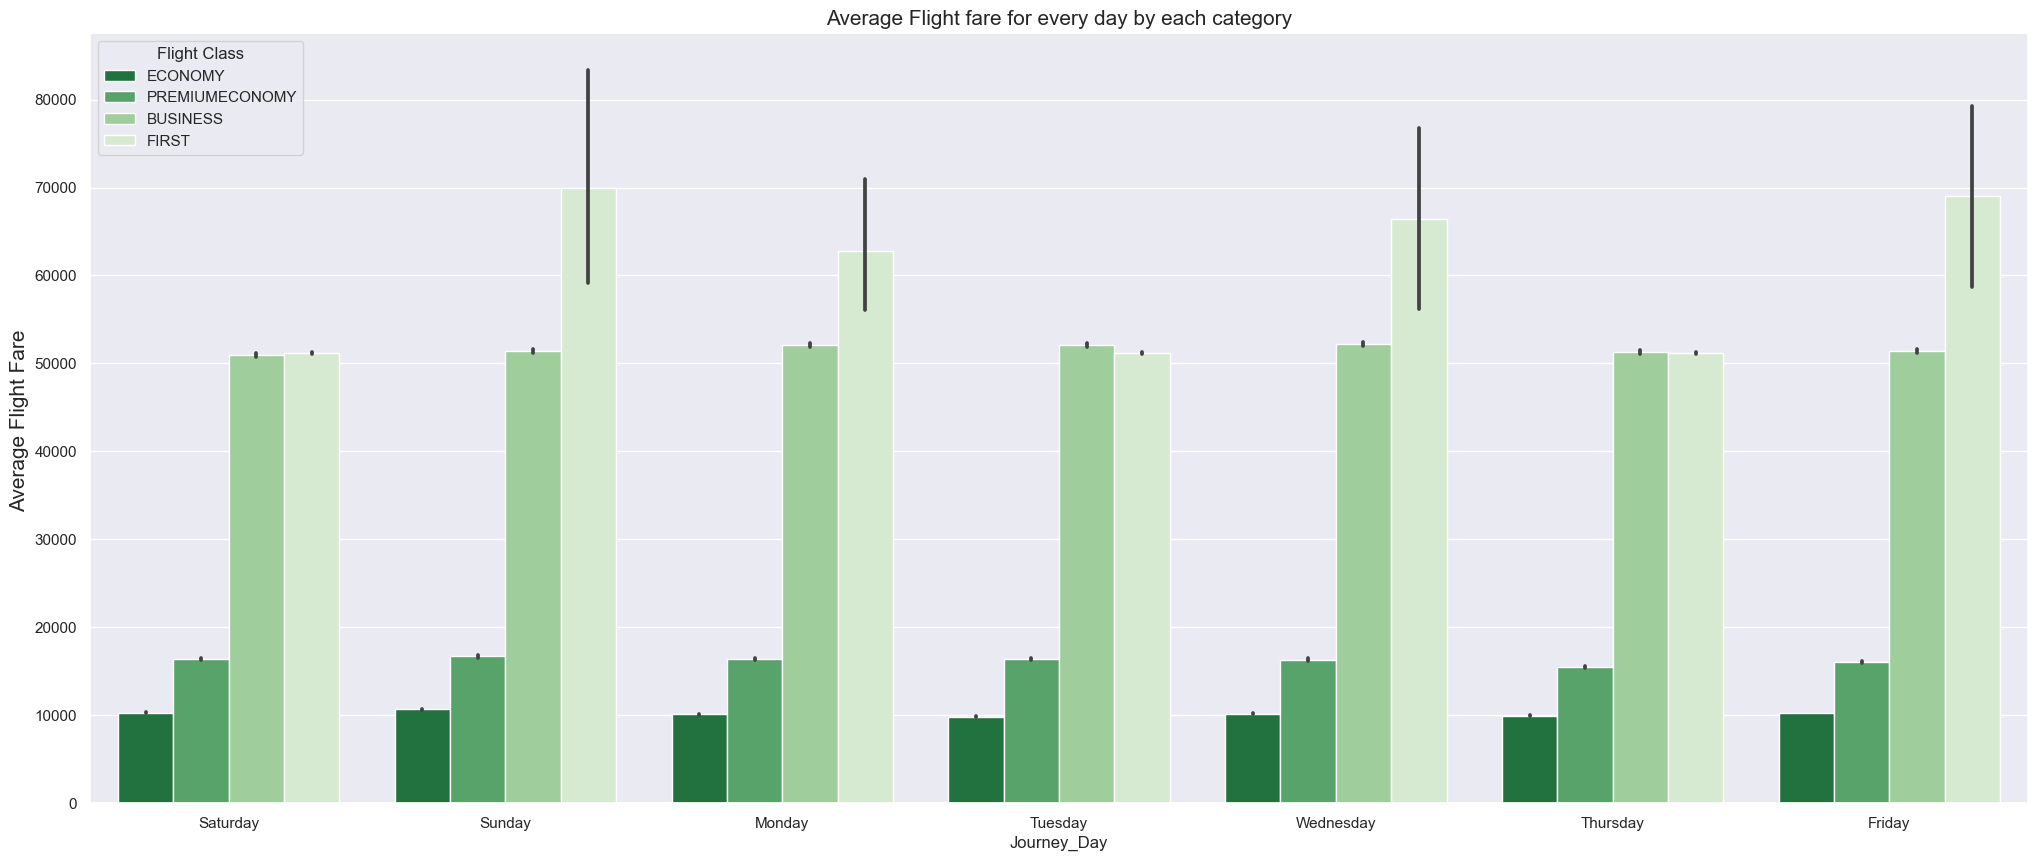

In [32]:
# Coverting the categorical into a numeric form using Label Encoder
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(25,10))
sns.barplot(x=df['Journey_Day'],y=df['Fare'],hue=df['Flight Class'],palette="Greens_r",order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.ylabel("Average Flight Fare ",size=15)
plt.title("Average Flight fare for every day by each category",size=15)
plt.show()

***The average price of flights remains relatively stable across different days, except for the first category where a noticeable change is observed***

### Average Fare vs Days Left

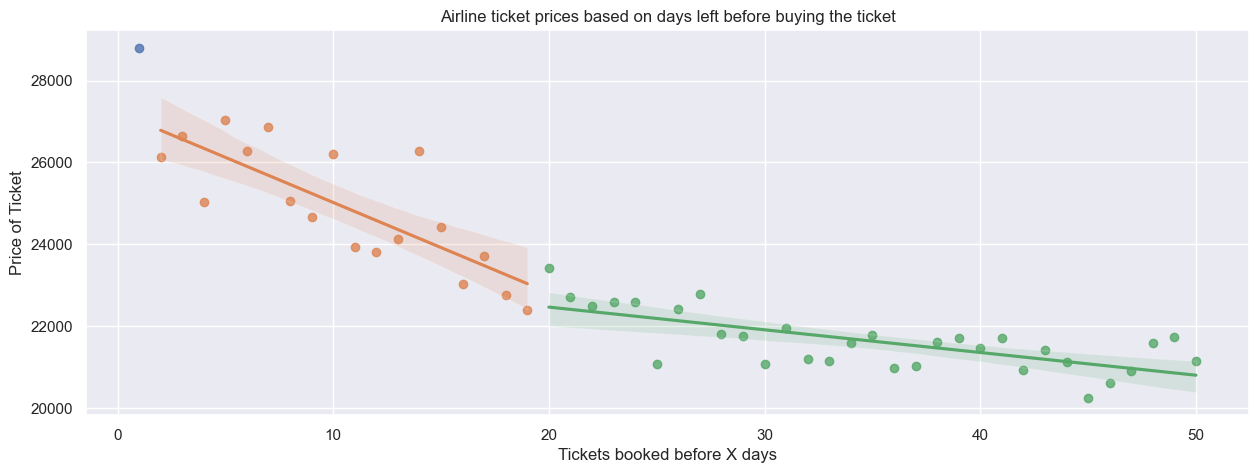

In [33]:
df_temp = df.groupby(['Days_left'])['Fare'].mean().reset_index()
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x = df_temp.loc[df_temp['Days_left'] == 1].Days_left, y = df_temp.loc[df_temp['Days_left'] == 1].Fare, data= df_temp, fit_reg= False, ax=ax)
sns.regplot(x = df_temp.loc[(df_temp['Days_left'] > 1) & (df_temp['Days_left'] < 20)].Days_left, y = df_temp.loc[(df_temp['Days_left'] > 1) & (df_temp['Days_left'] < 20)].Fare, data = df_temp, fit_reg= True, ax=ax)
sns.regplot(x = df_temp.loc[df_temp['Days_left'] >= 20].Days_left, y = df_temp.loc[df_temp['Days_left'] >= 20].Fare, data = df_temp, fit_reg= True, ax=ax)
ax.set(xlabel='Tickets booked before X days', ylabel='Price of Ticket',title='Airline ticket prices based on days left before buying the ticket')
plt.show(ax)

***From the above figure, we can conclude that ticket price rise slowly till 20 days from the date of flight, then rise sharply till the last day, while dramatically surge just 1 day before the date of flight. This can be explained by the fact that people usually buy flight tickets within 2-3 weeks of flight which generates more profits for airlines. On last day, prices show dramatic increase as airlines making an effort to optimize profits, ensuring that ticket prices reach a level that aligns with the airline's revenue goals***


**Early Purchases (20+ Days):**

During this period, passengers who book their tickets well in advance may benefit from relatively stable or gradually increasing prices. Airlines often encourage early bookings, and passengers may find more options and potentially lower fares compared to waiting until closer to the departure date.

**Last-Minute Pricing Strategy (Within 20 Days):**

Airlines often employ a last-minute pricing strategy within the final 20 days before a flight. During this period, ticket prices may increase due to factors such as high demand and limited availability of seats. This strategy allows airlines to optimize their revenue by adjusting prices based on the urgency and demand for tickets close to the departure date.

**Late Surge for Profit Optimization:**

The significant surge in prices observed on the day prior to departure may be strategic on the part of airlines. This abrupt increase could be an effort to optimize profits, ensuring that ticket prices reach a level that aligns with the airline's revenue goals.

### Average Fare vs Duration

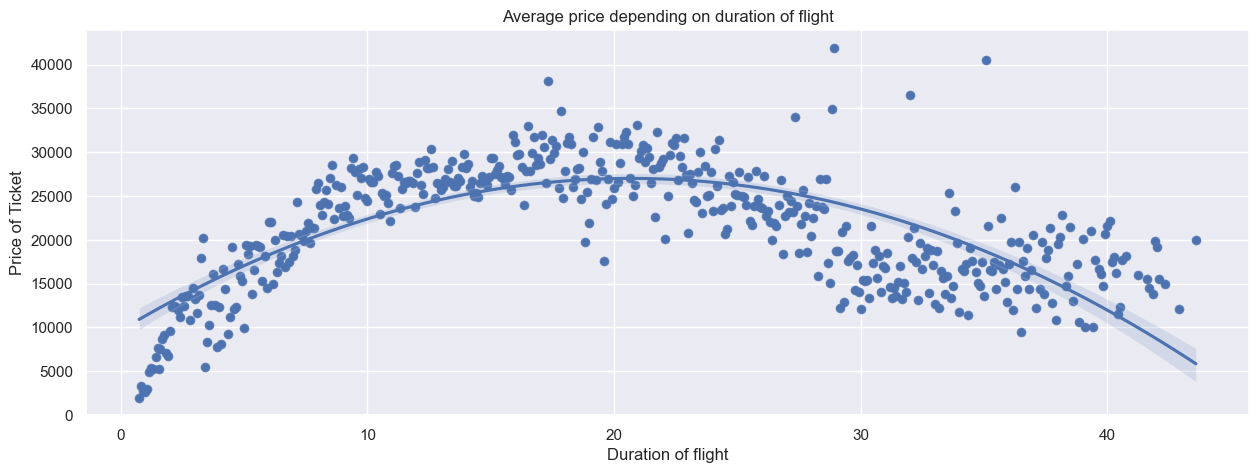

In [34]:
df_temp2 = df.groupby(['Duration'])['Fare'].mean().reset_index()
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x='Duration', y='Fare', data = df_temp2)
PD = sns.regplot(x='Duration', y='Fare', data = df_temp2, order = 2)
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket',title='Average price depending on duration of flight')
plt.show(PD)

***From the above figure, we can see that the relationship is not linear but can be approximated by second degree curve. We can see linear growth in prices as duration of flight increases till 20 and then lowering again.
Some outliers may be affecting the curve.***

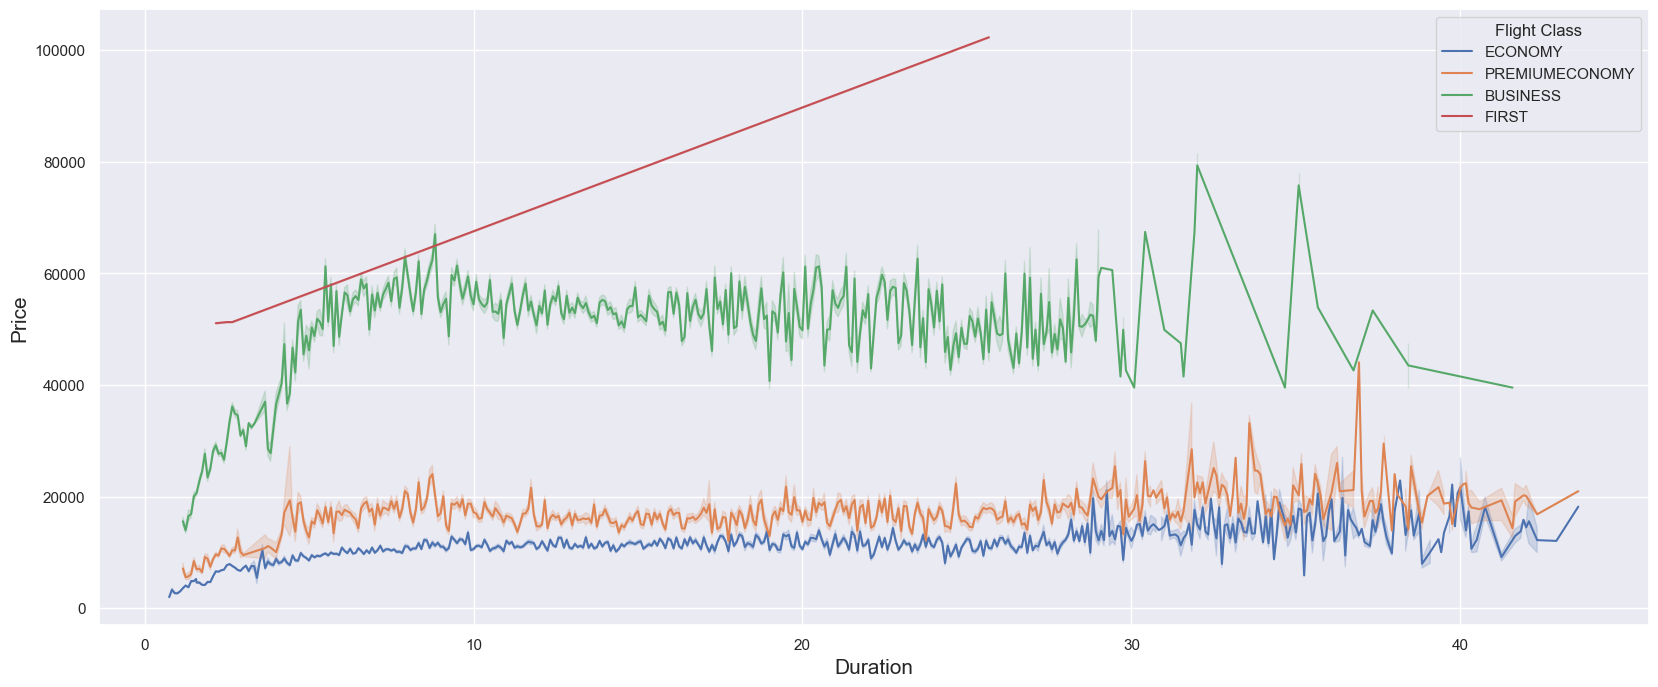

In [35]:

plt.figure(figsize=(20,8))
sns.lineplot(data = df,x = 'Duration',y = 'Fare',hue = 'Flight Class')

plt.xlabel('Duration',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.show()

***There is a increase in fares as the duration in hour increase for first class (passengers opting for first-class accommodations may experience higher costs for longer flights)***

***Business class illustrates a notable surge in prices for flights lasting between 1 to 5 hours***

***In other clasess there is high fluctuations in the fare values but not great sign of increase***


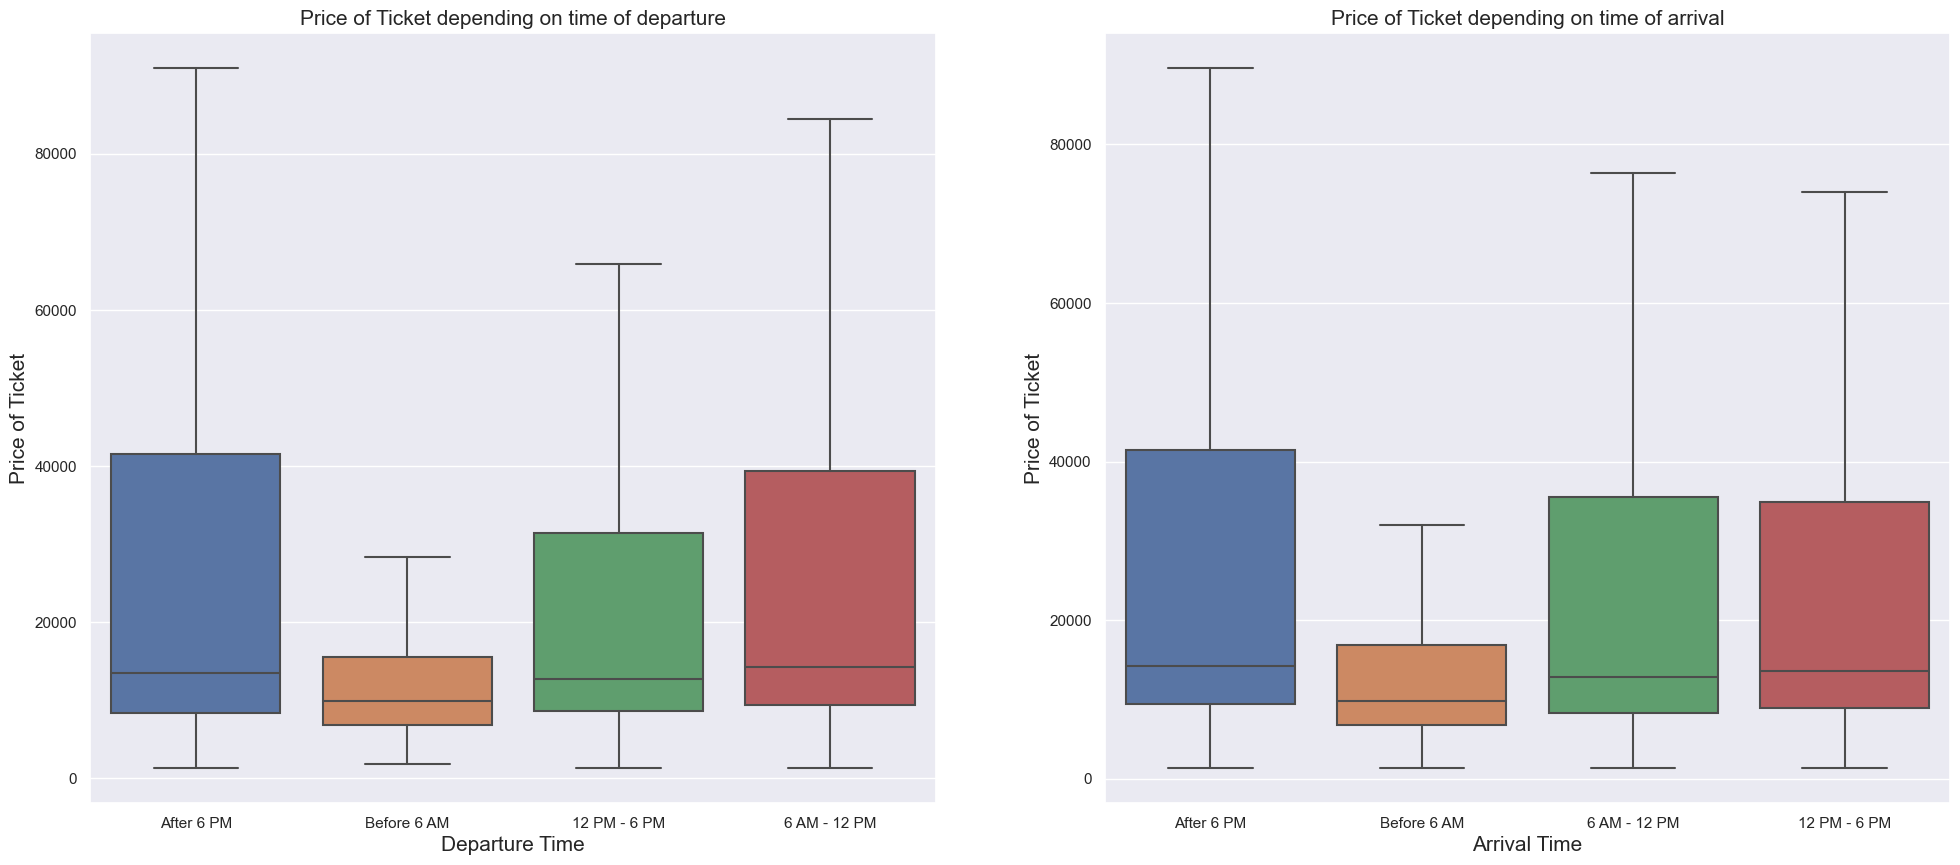

In [36]:
plt.figure(figsize=(24, 10))

# Subplot 1
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=df, x='Departure', y='Fare', showfliers=False)
ax1.set(xlabel='Departure Time', ylabel='Price of Ticket')
ax1.set_xlabel('Departure Time', fontsize=15)
ax1.set_ylabel('Price of Ticket', fontsize=15)
ax1.set_title('Price of Ticket depending on time of departure', fontsize=15)

# Subplot 2
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(data=df, x='Arrival', y='Fare', showfliers=False)
ax2.set(xlabel='Arrival Time', ylabel='Price of Ticket')
ax2.set_xlabel('Arrival Time', fontsize=15)
ax2.set_ylabel('Price of Ticket', fontsize=15)
ax2.set_title('Price of Ticket depending on time of arrival', fontsize=15)

plt.show()


### Average Fare vs Departure & Arrival Time

***Flight prices vary depending on the Departure time of the flights. The highest fares are observed for flights departure in the evening (after 6 PM),while the cheapest fares are observed for flights departure before 6 AM***

***Flight prices vary depending on the arrival time of the flights. The highest fares are observed for flights arriving in the evening (after 6 PM),while the cheapest fares are observed for flights arriving before 6 AM***

### Average Fare vs Airline

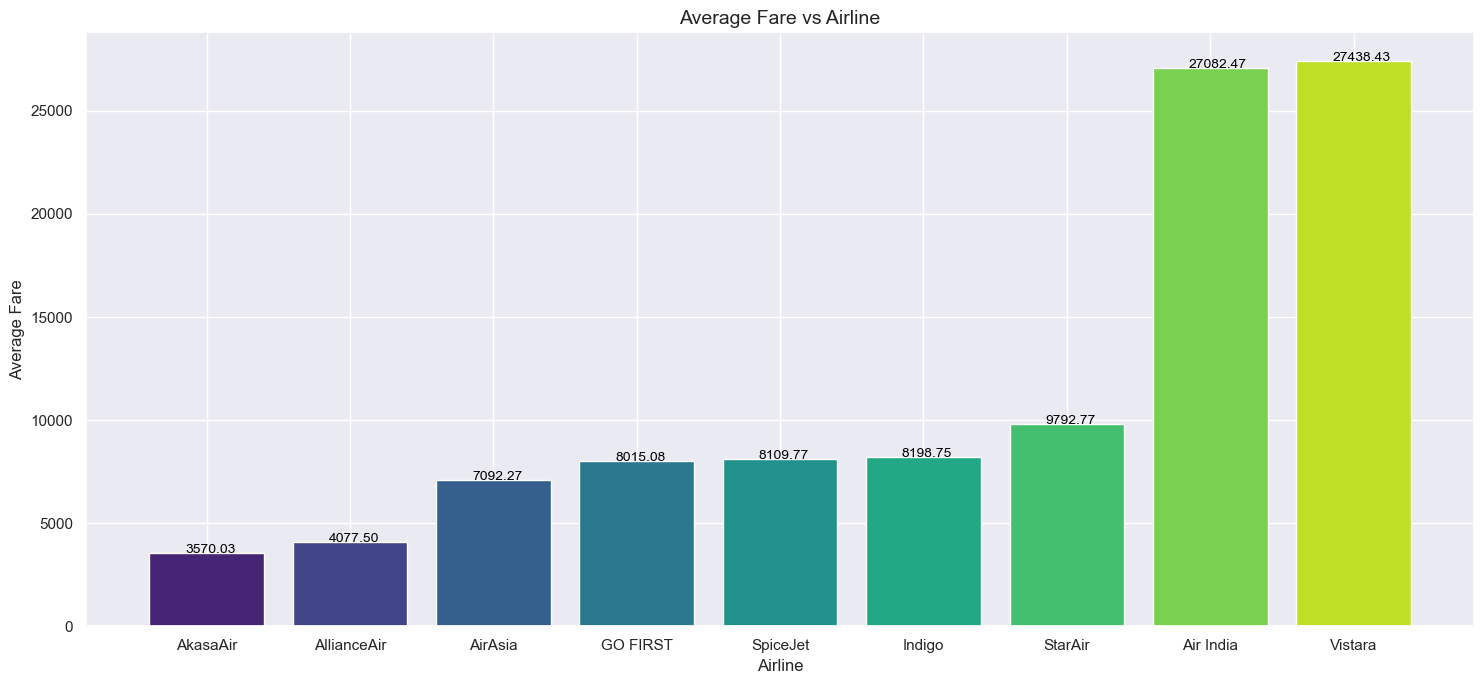

In [37]:
# Group the data by Arrival and calculate the mean Fare
airline_fares = df.groupby('Airline')['Fare'].mean().sort_values()
# Set a color palette for the plot
colors = sns.color_palette('viridis', len(airline_fares))

# Plot the bar chart with customized aesthetics
plt.figure(figsize=(15, 7))
bars = plt.bar(airline_fares.index, airline_fares.values, color=colors)

# Add data labels on top of the bars
for bar, label in zip(bars, airline_fares.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 5, f'{label:.2f}', fontsize=10, color='black')
plt.title('Average Fare vs Airline', fontsize=14)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)

plt.tight_layout()
plt.show()

***Air India & Vistara has the highest average Price while AkasaAir has the cheapest price*** 

### Average Fare vs Airline for each Classes

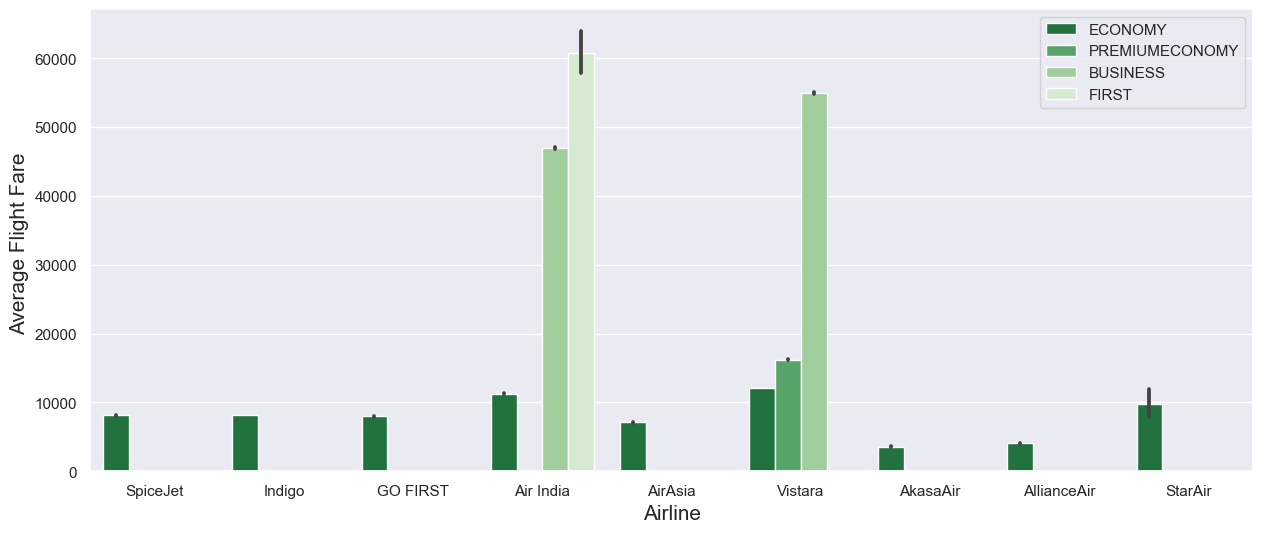

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Airline'],y=df['Fare'],hue=df['Flight Class'],palette="Greens_r")
plt.ylabel("Average Flight Fare ",size=15)
plt.xlabel("Airline",size=15)

# Move the legend to the top-right corner
plt.legend(loc='upper right')

plt.show()

***Air India has the highest average flight prices primarily due to the inclusion of premium classes, namely First and Business classes, in their offerings. Additionally, Vistara's Premium Economy class, known for its elevated amenities, contributes to the relatively higher average fare for Vistara. For economy flights, both Vistara and Air India tend to have slightly higher prices, reflecting the added value and services provided in comparison to other airlines. On the contrary, Akasa Air, with its focus on cost-effectiveness, offers flights at comparatively lower prices, contributing to its position with the lowest average fares among the observed airlines***

## Average Fare vs Source & Destination

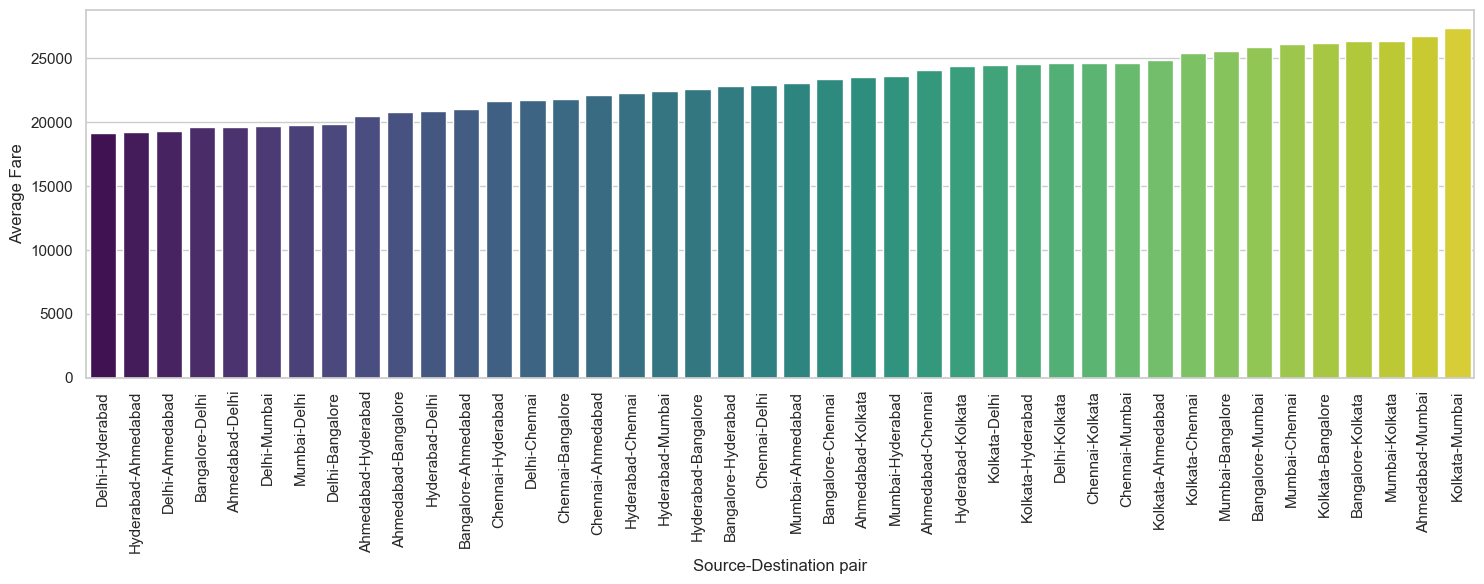

In [39]:
# Calculate the mean fare for each source-destination pair
mean_fare = df.groupby(['Source', 'Destination'])['Fare'].mean().reset_index(name='Mean Fare')

# Sort the data by mean fare
mean_fare = mean_fare.sort_values(by='Mean Fare')

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot a bar chart of the mean fare by source-destination pairs
fig, ax = plt.subplots(figsize=(15, 6))
bars = sns.barplot(x=mean_fare['Source'] + '-' + mean_fare['Destination'],
                   y=mean_fare['Mean Fare'],
                   palette='viridis')

# Add labels and title
ax.set(xlabel='Source-Destination pair', ylabel='Average Fare')


plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()



***Among the various routes, the Kolkata-Mumbai route stands out with the highest average fare. In contrast, the Delhi-Hyderabad route claims the title for the lowest average fare. These disparities in average fares reflect the pricing dynamics across different source-destination pairs in the dataset.From the above figure, we can conclude that Delhi usually cheaper which can be explained by the fact that Delhi being capital has very strong connectivity with every other city and more no. of freqencies resulting in cheaper ticket prices***

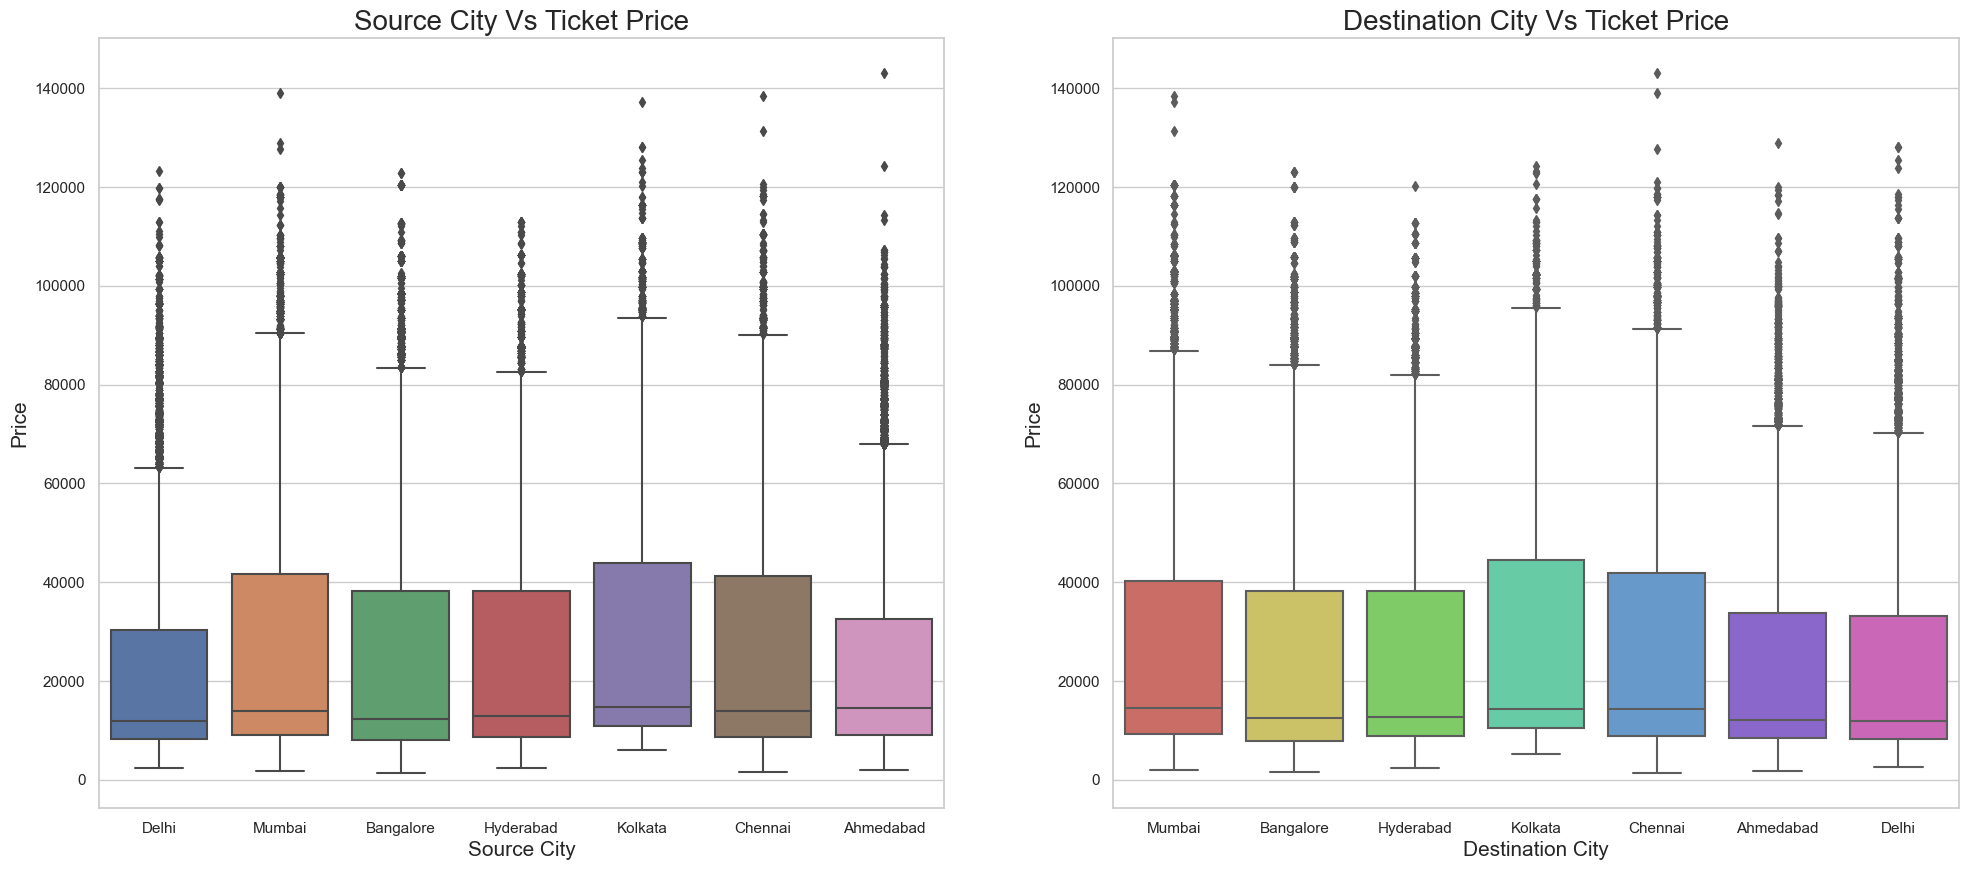

In [40]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Source',y='Fare',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Fare',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

***How the price changes with change in Source city and Destination city?***
1. Source City Vs Ticket Price

*Ticket Price is More for the Flights whose Source City is Kolkata*

*Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore*

*Ticket Price is Low for the Flights Having Source City as Delhi*

2. Destination City Vs Ticket Price

*Ticket Price is More for the Flights whose Destination City is kolkata and Chennai*

*Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore*

*Ticket Price is Low for the Flights Having Destination City as Delhi*

## Average Fare vs Total Stops

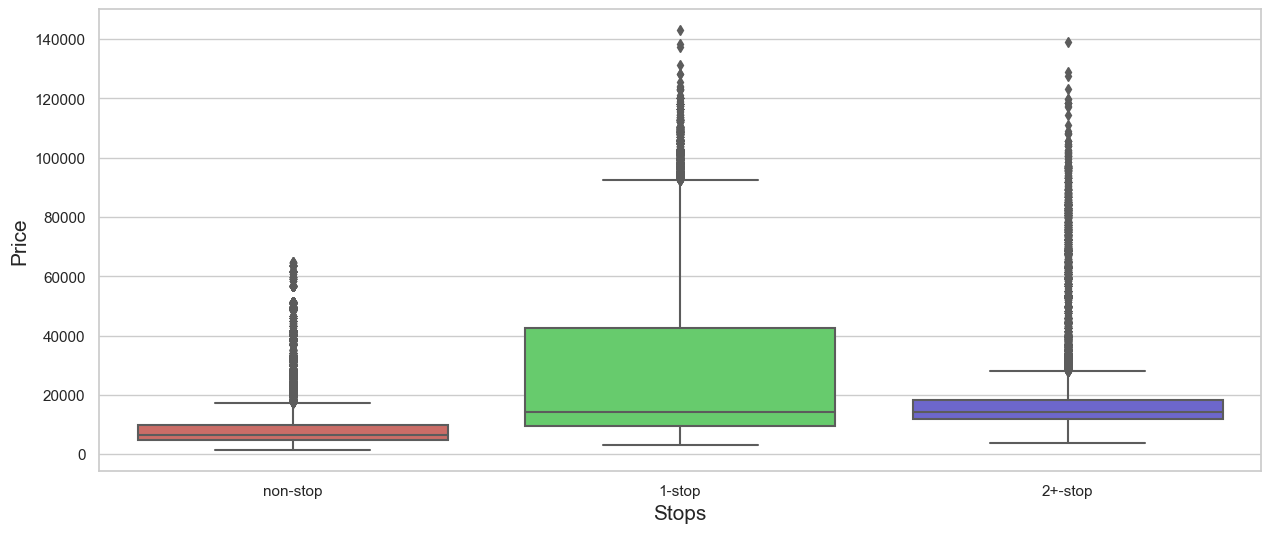

In [41]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Total Stops',y='Fare',data=df,palette='hls')

plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


***Flights with 1-stop has the highest mean price and variance and non-stop has the cheapest price but lower variance
this result not make sense as non-stop flight expected to have more price than 1-stop and 2+-stop***

### Total number of Flights from one city to another



In [42]:
df.groupby(['Flight Code','Source','Destination','Airline','Flight Class'],as_index=False).count().groupby(['Airline','Source','Destination'],as_index=False)['Flight Code'].count().head(50)

,Airline,Source,Destination,Flight Code
0,Air India,Ahmedabad,Bangalore,10
1,Air India,Ahmedabad,Chennai,10
2,Air India,Ahmedabad,Delhi,10
3,Air India,Ahmedabad,Hyderabad,10
4,Air India,Ahmedabad,Kolkata,10
5,Air India,Ahmedabad,Mumbai,10
6,Air India,Bangalore,Ahmedabad,28
7,Air India,Bangalore,Chennai,27
8,Air India,Bangalore,Delhi,31
9,Air India,Bangalore,Hyderabad,27


### Average Price of different Airlnes from Source city to Destination city



In [43]:
df.groupby(['Airline','Source','Destination'],as_index=False)['Fare'].mean().head(50)

,Airline,Source,Destination,Fare
0,Air India,Ahmedabad,Bangalore,30676.856459
1,Air India,Ahmedabad,Chennai,31588.883432
2,Air India,Ahmedabad,Delhi,25210.371859
3,Air India,Ahmedabad,Hyderabad,27612.425024
4,Air India,Ahmedabad,Kolkata,29035.383610
5,Air India,Ahmedabad,Mumbai,30448.398220
6,Air India,Bangalore,Ahmedabad,27459.788346
7,Air India,Bangalore,Chennai,28978.088460
8,Air India,Bangalore,Delhi,23134.751645
9,Air India,Bangalore,Hyderabad,27742.954733


In [44]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
df.head()

,Date of Journey,Journey_Day,Days_left,Airline,Flight Code,Flight Class,Source,Departure,Total Stops,Arrival,Destination,Duration,Fare
0,2023-01-16,Monday,1,6,1214,1,3,2,2,2,6,2.083333,5335.0
1,2023-01-16,Monday,1,5,356,1,3,2,2,3,6,2.333333,5899.0
2,2023-01-16,Monday,1,4,929,1,3,2,2,3,6,2.166667,5801.0
3,2023-01-16,Monday,1,6,1228,1,3,2,2,2,6,2.083333,5794.0
4,2023-01-16,Monday,1,0,852,1,3,2,2,2,6,2.166667,5955.0


In [45]:
df=df.drop(columns=['Date of Journey','Journey_Day'])
df.head()

,Days_left,Airline,Flight Code,Flight Class,Source,Departure,Total Stops,Arrival,Destination,Duration,Fare
0,1,6,1214,1,3,2,2,2,6,2.083333,5335.0
1,1,5,356,1,3,2,2,3,6,2.333333,5899.0
2,1,4,929,1,3,2,2,3,6,2.166667,5801.0
3,1,6,1228,1,3,2,2,2,6,2.083333,5794.0
4,1,0,852,1,3,2,2,2,6,2.166667,5955.0


In [46]:
df.corr()

,Days_left,Airline,Flight Code,Flight Class,Source,Departure,Total Stops,Arrival,Destination,Duration,Fare
Days_left,1.000000,-0.002797,0.001574,-0.020418,-0.013636,-0.007456,0.001784,-0.003738,0.007383,-0.032624,-0.087484
Airline,-0.002797,1.000000,0.603507,0.313033,-0.041350,0.004011,-0.024630,-0.039763,-0.025749,0.004446,0.058051
Flight Code,0.001574,0.603507,1.000000,0.202540,-0.012625,0.004318,-0.120988,-0.050113,-0.028072,0.290728,0.250717
Flight Class,-0.020418,0.313033,0.202540,1.000000,-0.025207,-0.001304,0.040996,-0.015781,-0.020795,0.070626,-0.525872
Source,-0.013636,-0.041350,-0.012625,-0.025207,1.000000,-0.081643,0.050592,0.013529,-0.176273,-0.028505,0.028645
Departure,-0.007456,0.004011,0.004318,-0.001304,-0.081643,1.000000,0.013326,-0.096585,0.005702,0.094241,-0.008668
Total Stops,0.001784,-0.024630,-0.120988,0.040996,0.050592,0.013326,1.000000,-0.003911,0.029075,-0.418991,-0.237852
Arrival,-0.003738,-0.039763,-0.050113,-0.015781,0.013529,-0.096585,-0.003911,1.000000,0.005250,-0.022618,-0.013135
Destination,0.007383,-0.025749,-0.028072,-0.020795,-0.176273,0.005702,0.029075,0.005250,1.000000,-0.030142,0.034460
Duration,-0.032624,0.004446,0.290728,0.070626,-0.028505,0.094241,-0.418991,-0.022618,-0.030142,1.000000,0.193277


***There is a positive correlation between X and Y, meaning that as X increases, Y also tends to increase.
A negative correlation between A and B implies that as A increases, B tends to decrease.***

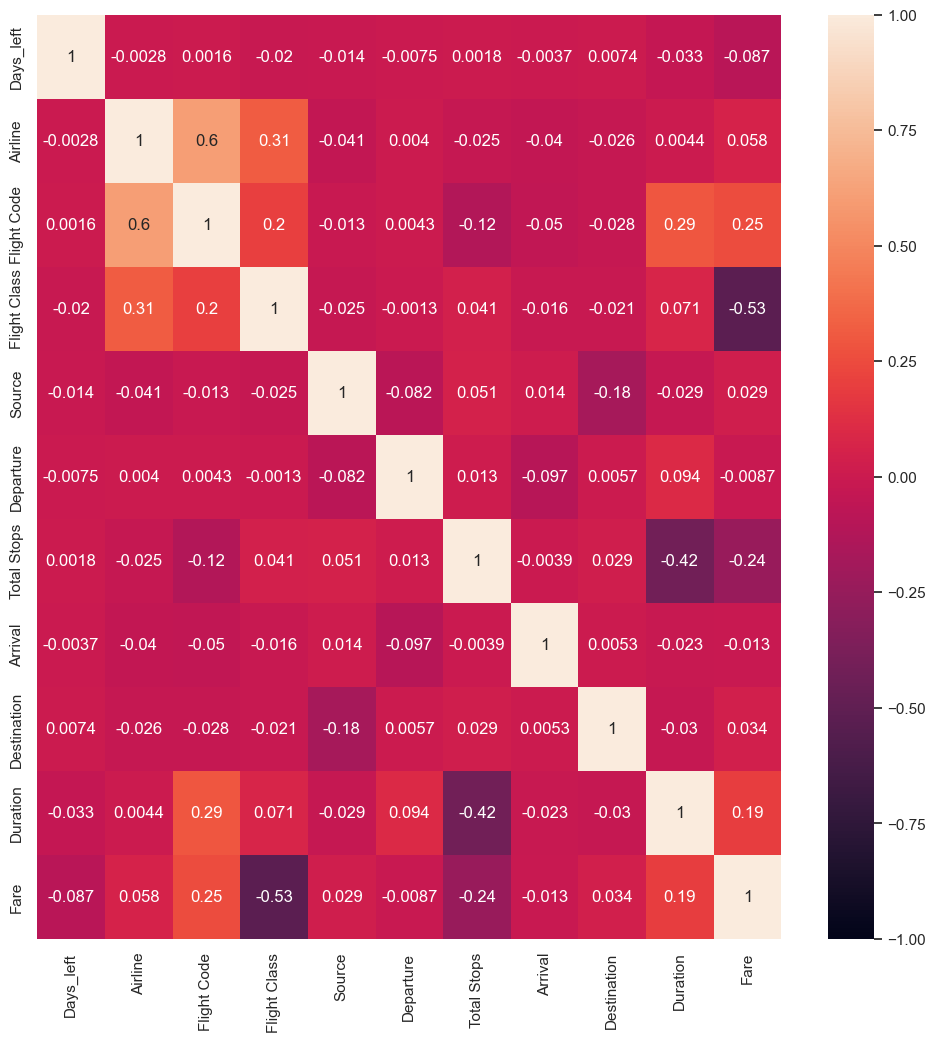

In [47]:
p = df.corr(method='pearson')
plt.figure(figsize=(12,12))
heatmap = sns.heatmap(p, vmin=-1, vmax=1, annot=True)


***Multicollinearity is a concern in linear regression models where the goal is to estimate the coefficients associated with individual features. However, in the context of k-nearest neighbors (KNN) models, multicollinearity is less of an issue. KNN is a non-parametric algorithm that doesn't estimate explicit coefficients for features, and it doesn't assume a linear relationship between features and the target variable.***

In [48]:
# Storing the Independent Variables (Features) in X
x = df.drop(['Fare'], axis=1)

# Storing the Dependent Variable (Target) in y
y = df['Fare']


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#This statistic measures how much the variance of an estimated regression coefficient is inflated due to multicollinearity
# Assuming X is your feature matrix
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)


        Feature        VIF
0     Days_left   3.653863
1       Airline   5.569548
2   Flight Code  13.549443
3  Flight Class   2.406130
4        Source   3.124233
5     Departure   2.591419
6   Total Stops   1.413644
7       Arrival   2.892899
8   Destination   3.172277
9      Duration   5.020930


***VIF < 5: Low multicollinearity (Variables are not highly correlated).***

***5 < VIF < 10: Moderate multicollinearity (Consider further investigation).***

***VIF > 10: High multicollinearity (Variables are highly correlated)***

In [50]:
# Importing the train_test_split function
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Checking the shapes of the resulting sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(311756, 10) (133610, 10) (311756,) (133610,)


The goal is to train  model using x_train and y_train and then evaluate its performance on unseen data using x_test and y_test. The shapes you provided suggest that you have 10 features in your dataset. Each row corresponds to a data point, and the arrays y_train and y_test contain the corresponding target values.

In [51]:
# Scaling the values to convert the int values to Machine Languages(Machine learning algorithms, such as gradient descent-based methods (e.g., linear regression, neural networks), often perform better when features are on a similar scale. )
# Importing the MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler with a feature range between 0 and 1
mmscaler = MinMaxScaler(feature_range=(0, 1))

# Scaling the training set features
x_train = mmscaler.fit_transform(x_train)

# Scaling the testing set features
x_test = mmscaler.fit_transform(x_test)

# Converting the scaled arrays back to DataFrames (optional)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)


In [52]:
x={'Model Name':[],'Mean Absolute Error_MAE':[],'Mean Absolute Percentage Error_MAPE':[],'Mean Squared Error_MSE':[],'Root Mean Squared Error_RMSE':[],'Root Mean Squared Log Error_RMSLE':[],'Adj_R.Square':[],'R2_score':[]}
results=pd.DataFrame(x)
results.head()

,Model Name,Mean Absolute Error_MAE,Mean Absolute Percentage Error_MAPE,Mean Squared Error_MSE,Root Mean Squared Error_RMSE,Root Mean Squared Log Error_RMSLE,Adj_R.Square,R2_score


In [53]:
pip install xgboost

In [54]:
#importing models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #linear relationship between independent variable and target variable
from sklearn.linear_model import Ridge #penalised regression(prevent overfitting by adding penality term).
from sklearn.linear_model import Lasso #penalised regression(use another penality term instead of penality term used in ridge)
from sklearn.tree import DecisionTreeRegressor #nonparametric supervised learning method.They split the data into branches based on feature values to predict the target variable
from sklearn.ensemble import RandomForestRegressor #Ensemble learning method(combining the predictions of multiple models)that builds multiple decision trees and combines their predictions to improve generalization and reduce overfitting.
from sklearn.ensemble import ExtraTreesRegressor # similar to RandomForest, is an ensemble learning method that constructs a multitude of decision trees and combines their predictions.
from sklearn.ensemble import BaggingRegressor #ensemble meta-estimator that fits base regressors on random subsets of the original dataset and then aggregates their individual predictions.
from sklearn.ensemble import GradientBoostingRegressor # ensemble method that builds decision trees sequentially, where each tree tries to correct the errors made by the previous one, resulting in a strong predictive model.
import xgboost as xgb #XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.
from sklearn.neighbors import KNeighborsRegressor #simple algorithm that stores all available cases and predicts the numerical target based on the average of the k nearest neighbors' values.
from sklearn.svm import SVR #SVR (Support Vector Regression)is a type of support vector machine (SVM) that is used for regression tasks.



In [55]:
# Create objects of Regression / Regressor models with default hyper-parameters
modelLR = LinearRegression()
modelDTR = DecisionTreeRegressor()
modelBR = BaggingRegressor()
modelRFR = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

In [56]:
modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [66]:
from sklearn import metrics  # Import the metrics module
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MM = [modelLR, modelDTR, modelBR, modelRFR, modelXGR, modelKNN, modelETR, modelRE, modelLO]

for model in MM:
    # Fit the model with train data
    model.fit(x_train, y_train)
    
    # Predict the model with test data
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Print the model name and metrics
    print('Model Name:', model)
    print('Root Mean Square Error (RMSE):', rmse)
    print('R2 Score:', r2)
    print('Mean Absolute Error (MAE):', mae)
    print('Mean Absolute Percentage Error (MAPE):', mape)


    print('------------------------------------------------------------------------------------------------------------')


Model Name: LinearRegression()
Root Mean Square Error (RMSE): 15029.430783445983
R2 Score: 0.4595058505380357
Mean Absolute Error (MAE): 12360.028018683424
Mean Absolute Percentage Error (MAPE): 92.61496843827418
------------------------------------------------------------------------------------------------------------
Model Name: DecisionTreeRegressor()
Root Mean Square Error (RMSE): 5507.0616966100615
R2 Score: 0.9274318893767893
Mean Absolute Error (MAE): 2320.1124990644416
Mean Absolute Percentage Error (MAPE): 10.8420676100248
------------------------------------------------------------------------------------------------------------
Model Name: BaggingRegressor()
Root Mean Square Error (RMSE): 4377.38530986246
R2 Score: 0.9541504070635299
Mean Absolute Error (MAE): 2076.5215549951113
Mean Absolute Percentage Error (MAPE): 9.667181037782711
------------------------------------------------------------------------------------------------------------
Model Name: RandomForestRegresso

In [67]:
import pandas as pd

MM = [modelLR, modelDTR, modelBR, modelRFR, modelXGR, modelKNN, modelETR, modelRE, modelLO]

# Create an empty list to store the evaluation metrics for each model
metrics_list = []

for model in MM:
    # Fit the model with train data
    model.fit(x_train, y_train)
    
    # Predict the model with test data
    y_pred = model.predict(x_test)
    
    # Evaluation metrics
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = metrics.r2_score(y_test, y_pred)
    rmsle = np.log(np.sqrt(mse))
    mape = MAPE(y_test, y_pred)
    
    # Adjusted R-squared value
    n_samples = len(y_test)
    n_features = x_train.shape[1]  # Assuming all models are trained on the same features
    adjusted_r_squared = 1 - (1 - r_squared) * (n_samples - 1) / (n_samples - n_features - 1)
    
    # Store evaluation metrics in a dictionary
    metrics_dict = {
        'Model Name': str(model),
        'Mean Absolute Error (MAE)': round(mae, 3),
        'Root Mean Squared Error (RMSE)': round(rmse, 3),
        'R2_score': round(r_squared, 6),
        'Mean Absolute Percentage Error (MAPE)': round(mape, 2),
    }
    
    # Append the dictionary to the list
    metrics_list.append(metrics_dict)

# Create a DataFrame from the list of dictionaries
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(metrics_df)


                                          Model Name  \
0                                 LinearRegression()   
1                            DecisionTreeRegressor()   
2                                 BaggingRegressor()   
3                            RandomForestRegressor()   
4  XGBRegressor(base_score=None, booster=None, ca...   
5                              KNeighborsRegressor()   
6                              ExtraTreesRegressor()   
7                                            Ridge()   
8                                   Lasso(alpha=0.1)   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R2_score  \
0                  12360.028                       15029.431  0.459506   
1                   2308.467                        5474.505  0.928287   
2                   2082.988                        4371.235  0.954279   
3                   1996.039                        4168.221  0.958427   
4                   3195.122                        5579.299  0.92551

In [69]:
import pandas as pd

# Assuming metrics_df is your DataFrame containing the evaluation metrics

# Sort the DataFrame by 'Adjusted R-squared' column in descending order
metrics_df_sorted = metrics_df.sort_values(by='R2_score', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(metrics_df_sorted)


                                          Model Name  \
0                              ExtraTreesRegressor()   
1                            RandomForestRegressor()   
2                                 BaggingRegressor()   
3                              KNeighborsRegressor()   
4                            DecisionTreeRegressor()   
5  XGBRegressor(base_score=None, booster=None, ca...   
6                                 LinearRegression()   
7                                            Ridge()   
8                                   Lasso(alpha=0.1)   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R2_score  \
0                   1987.943                        4166.426  0.958463   
1                   1996.039                        4168.221  0.958427   
2                   2082.988                        4371.235  0.954279   
3                   2789.072                        5314.208  0.932425   
4                   2308.467                        5474.505  0.92828

##### From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are
##### 1. RandomForestRegressor    2. ExtraTreesRegressor    3. Bagging Regressor

### Training the Data with RandomForestRegressor

In [70]:
#Trainig the model with
modelRFR.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelRFR.predict(x_test)

In [72]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
out

,Price_actual,Price_pred
227718,2268.0,3214.33
358306,47745.0,47748.52
72455,12564.0,12362.40
93485,4485.0,5158.10
442352,47220.0,49453.50
...,...,...
29667,8129.0,8281.86
75854,5375.0,6847.82
228555,6585.0,9305.34
434224,60565.0,64608.77


In [71]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
out
result=df.merge(out, left_index=True, right_index=True)
result

,Days_left,Airline,Flight Code,Flight Class,Source,Departure,Total Stops,Arrival,Destination,Duration,Fare,Price_actual,Price_pred
2,1,4,929,1,3,2,2,3,6,2.166667,5801.0,5801.0,7014.310000
6,1,0,859,1,3,2,2,3,6,2.250000,5955.0,5955.0,8177.470000
7,1,4,918,1,3,2,2,2,6,2.250000,5899.0,5899.0,7435.110000
11,1,5,306,1,3,2,0,1,6,8.666667,6390.0,6390.0,13071.630000
24,1,1,1057,1,3,1,0,3,6,16.500000,6872.0,6872.0,6882.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445355,50,0,738,0,0,0,0,2,2,28.583333,54164.0,54164.0,53624.680000
445361,50,8,1358,0,0,3,0,0,2,11.250000,61302.0,61302.0,54499.143333
445363,50,8,1360,0,0,1,0,2,2,13.083333,65028.0,65028.0,47725.520000
445364,50,8,1358,0,0,3,0,0,2,11.250000,69254.0,69254.0,54499.143333


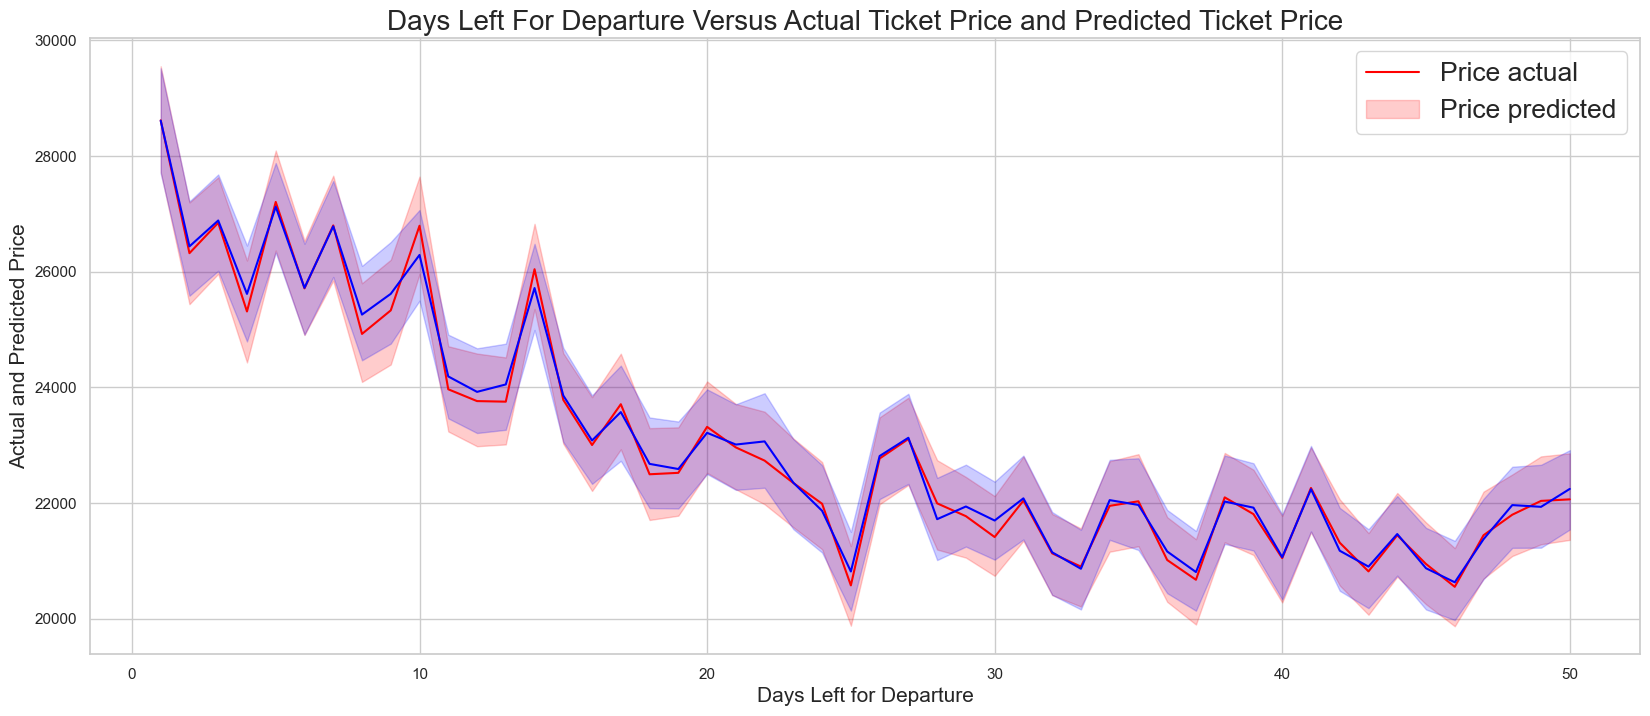

In [62]:

plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='Days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='Days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

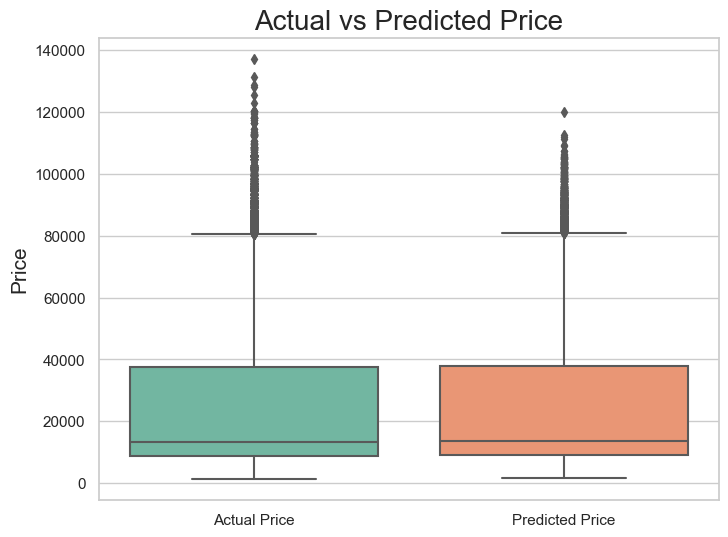

In [77]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=result[['Price_actual', 'Price_pred']], palette='Set2')
plt.title('Actual vs Predicted Price', fontsize=20)
plt.ylabel('Price', fontsize=15)
plt.xticks([0, 1], ['Actual Price', 'Predicted Price'])
plt.show()


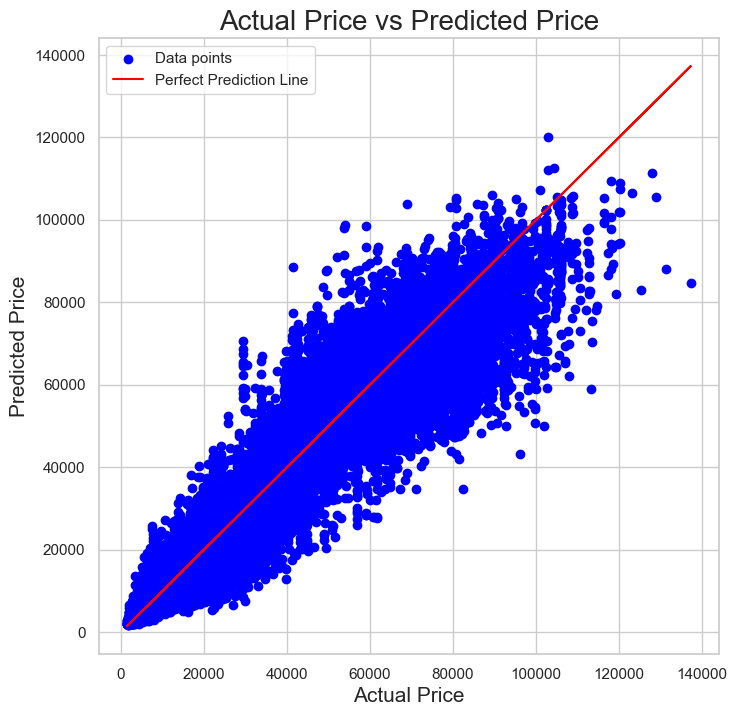

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(result['Price_actual'], result['Price_pred'], color='blue', label='Data points')
plt.plot(result['Price_actual'], result['Price_actual'], color='red', label='Perfect Prediction Line')
plt.title('Actual Price vs Predicted Price', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()
